# Case Petz vaga de cientista de dados Jr

# Análise de Internações no Sistema de Saúde Brasileiro

**Introdução**

Você foi contratado(a) para fazer uma análise apurada do número de internações no
sistema de saúde brasileiro. Esta análise é de extrema importância para tomada de
decisões que deverão contribuir para melhorias no sistema e planejamento estratégico.
Os dados em anexo (case_internacao_SUS.xls) são referentes às internações que
ocorreram no país durante o período de dezembro de 2017 a julho de 2019, separados
por região e unidade de federação (Fonte: Ministério da Saúde - Sistema de Informações
Hospitalares do SUS (SIH/SUS)).

**Base de dados**

- Link: http://tabnet.datasus.gov.br/cgi/sih/sxdescr.htm 

**Tratamento dos dados**


- 1: Muitas vezes, cerca de 70% do tempo de um projeto é despendido na coleta e tratamento dos dados. Sabendo disso, leia o arquivo e o transforme de modo a ter mais facilidade em analisar os dados. Lembre-se que essa etapa poderá te dar bons insumos.



**Análise**


- 2: Dados tratados, bora explorá-los? Faça uma boa EDA e não esqueça de anotar todos os insights que você obter. Gráficos e informações sem uma boa interpretação não valem, ok?



**Modelagem**


- 3: Agora que já tem certa intimidade com os dados, cite pelo menos 2 métodos possíveis para estimar os dados para os meses faltantes. Tente não se complicar aqui. Utilize os métodos mais simples e mais funcionais possíveis. Neste tópico, é importante que argumente o porquê dos métodos recomendados.Escolha um desses métodos e estime. 


- a) o número de Internações.

- b) o Valor Total das internações nos períodos faltantes.



**Crie um modelo que preveja** 


- a) As Internações.


- b) O número de Óbitos.


- c) O Valor Médio de AIH pelos próximos 6 meses. 

Explique a escolha do modelo e quais parâmetros utilizou para serem input no modelo.



**Planejamento estratégico**

- Com base nos dados e nas suas análises, que tipo de estratégia você sugeriria para diminuir o número de internações em hospitais do SUS? E para o Estado de São Paulo? Quais especificidades deveriam ser levadas em conta?


# 0 - Importação das bibliotecas

In [111]:
# Versão do python

from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.9.7


In [112]:
# Importação das bibliotecas 

import pandas as pd # Pandas carregamento csv
import numpy as np # Numpy para carregamento cálculos em arrays multidimensionais

# Visualização de dados
import seaborn as sns
import matplotlib as m
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

# Carregar as versões das bibliotecas
import watermark

# Warnings retirar alertas 
import warnings
warnings.filterwarnings("ignore")

In [113]:
# Versões das bibliotecas

%reload_ext watermark
%watermark -a "Versões das bibliotecas" --iversions

Author: Versões das bibliotecas

numpy     : 1.20.3
seaborn   : 0.11.2
pandas    : 1.3.4
watermark : 2.2.0
plotly    : 5.5.0
matplotlib: 3.4.3



In [114]:
# Configuração para os gráficos largura e layout dos graficos

plt.rcParams["figure.figsize"] = (25, 20)

plt.style.use('fivethirtyeight')
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

m.rcParams['axes.labelsize'] = 25
m.rcParams['xtick.labelsize'] = 25
m.rcParams['ytick.labelsize'] = 25
m.rcParams['text.color'] = 'k'

# 0.1) Base de dados

In [115]:
# Carregando a base de dados

base = pd.read_excel('case_internacao_SUS.xls', sheet_name=None)

# 0.2) Descrição dados

- Verificação de linhas colunas informaçãos dos dados e tipos de variáveis. Valores das colunas verficando dados nulos ou vazios.

In [117]:
# Exibido 5 primeiros dados

base_1.head()

,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,data
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125.28,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19
1,.. Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19
2,.. Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19
3,.. Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19
4,.. Pará,34774.0,34774.0,28178633.44,21241354.07,248197.25,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19


In [118]:
# Exibido 5 últimos dados 

base_1.tail()

,Região/Unidade da Federação,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_-_compl_federal,Val_serv_hosp_-_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_-_compl_federal,Val_serv_prof_-_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,data
29,.. Mato Grosso,14710.0,14786.0,1.526207e+07,1.225791e+07,970.38,-,3.002676e+06,-,-,1032.20,1037.53,69397.0,4.7,617.0,4.19,fev19
30,.. Goiás,26070.0,26646.0,3.359975e+07,2.662306e+07,327025.06,220665.44,6.267858e+06,220665.44,7093.39,1260.97,1288.83,125461.0,4.8,920.0,3.53,fev19
31,.. Distrito Federal,18473.0,18502.0,1.849633e+07,1.477508e+07,-,-,3.721253e+06,-,-,999.69,1001.26,104719.0,5.7,499.0,2.70,fev19
32,Total,947202.0,961714.0,1.226362e+09,9.773662e+08,3253568.73,350177.94,2.433945e+08,350177.94,244937.51,1275.18,1294.72,4968008.0,5.2,39496.0,4.17,fev19
33,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fev19


In [119]:
# Número de linhas e colunas

base_1.shape

(480, 17)

In [120]:
# Verificando informações das variaveis

base_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 0 to 33
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Região/Unidade da Federação    475 non-null    object 
 1   Internações                    461 non-null    float64
 2   AIH_aprovadas                  461 non-null    float64
 3   Valor_total                    461 non-null    float64
 4   Valor_serviços_hospitalares    461 non-null    float64
 5   Val_serv_hosp_-_compl_federal  461 non-null    object 
 6   Val_serv_hosp_-_compl_gestor   461 non-null    object 
 7   Valor_serviços_profissionais   461 non-null    float64
 8   Val_serv_prof_-_compl_federal  461 non-null    object 
 9   Val_serv_prof_-_compl_gestor   461 non-null    object 
 10  Valor_médio_AIH                461 non-null    float64
 11  Valor_médio_intern             461 non-null    float64
 12  Dias_permanência               461 non-null    floa

In [121]:
# Exibido tipos de dados

base_1.dtypes

Região/Unidade da Federação       object
Internações                      float64
AIH_aprovadas                    float64
Valor_total                      float64
Valor_serviços_hospitalares      float64
Val_serv_hosp_-_compl_federal     object
Val_serv_hosp_-_compl_gestor      object
Valor_serviços_profissionais     float64
Val_serv_prof_-_compl_federal     object
Val_serv_prof_-_compl_gestor      object
Valor_médio_AIH                  float64
Valor_médio_intern               float64
Dias_permanência                 float64
Média_permanência                float64
Óbitos                           float64
Taxa_mortalidade                 float64
data                              object
dtype: object

In [122]:
# Total de colunas e linhas 

print("Números de linhas: {}" .format(base_1.shape[0]))
print("Números de colunas: {}" .format(base_1.shape[1]))

Números de linhas: 480
Números de colunas: 17


In [123]:
# Exibindo valores ausentes e valores únicos

print("\nMissing values :  ", base_1.isnull().sum().values.sum())
print("\nUnique values :  \n",base_1.nunique())


Missing values :   290

Unique values :  
 Região/Unidade da Federação       34
Internações                      456
AIH_aprovadas                    458
Valor_total                      461
Valor_serviços_hospitalares      461
Val_serv_hosp_-_compl_federal    336
Val_serv_hosp_-_compl_gestor     102
Valor_serviços_profissionais     461
Val_serv_prof_-_compl_federal    102
Val_serv_prof_-_compl_gestor      90
Valor_médio_AIH                  460
Valor_médio_intern               458
Dias_permanência                 461
Média_permanência                 37
Óbitos                           429
Taxa_mortalidade                 254
data                              14
dtype: int64


# 0.3) Verificação dos dados



In [124]:
# Cópia de segurança dos dados

data_1 = base_1.copy()

# Renomeando colunas
n_1 = data_1.columns
n_2 = lambda x: x.lower()
base = list(map(n_2, n_1))

data_1.columns = base
data_1.columns = ["Região",
                  "Internações",
                  "AIH_aprovadas",
                  "Valor_total",
                  "Valor_serviços_hospitalares",
                  "Val_serv_hosp_compl_federal",
                  "Val_serv_hosp_compl_gestor",
                  "Valor_serviços_profissionais",
                  "Val_serv_prof_compl_federal",
                  "Val_serv_prof_compl_gestor",
                  "Valor_médio_AIH",
                  "Valor_médio_intern",
                  "Dias_permanência",
                  "Média_permanência",
                  "Óbitos",
                  "Taxa_mortalidade",
                  "Data"]

data_1.head()

,Região,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_compl_federal,Val_serv_hosp_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_compl_federal,Val_serv_prof_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Data
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125.28,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19
1,.. Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19
2,.. Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19
3,.. Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19
4,.. Pará,34774.0,34774.0,28178633.44,21241354.07,248197.25,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19


In [125]:
# Dados faltantes coluna óbitos

data = data_1[data_1["Óbitos"].notnull()]
data.isna().sum()

Região                          0
Internações                     0
AIH_aprovadas                   0
Valor_total                     0
Valor_serviços_hospitalares     0
Val_serv_hosp_compl_federal     0
Val_serv_hosp_compl_gestor      0
Valor_serviços_profissionais    0
Val_serv_prof_compl_federal     0
Val_serv_prof_compl_gestor      0
Valor_médio_AIH                 0
Valor_médio_intern              0
Dias_permanência                0
Média_permanência               0
Óbitos                          0
Taxa_mortalidade                0
Data                            0
dtype: int64

In [126]:
# Dados faltantes colunas internacoes

data = data_1[data_1["Internações"].notnull()]
data.isna().sum()

Região                          0
Internações                     0
AIH_aprovadas                   0
Valor_total                     0
Valor_serviços_hospitalares     0
Val_serv_hosp_compl_federal     0
Val_serv_hosp_compl_gestor      0
Valor_serviços_profissionais    0
Val_serv_prof_compl_federal     0
Val_serv_prof_compl_gestor      0
Valor_médio_AIH                 0
Valor_médio_intern              0
Dias_permanência                0
Média_permanência               0
Óbitos                          0
Taxa_mortalidade                0
Data                            0
dtype: int64

In [127]:
# Removendo dados ausentes do dataset 

data_1 = data_1.dropna()
data_1.head()

,Região,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_compl_federal,Val_serv_hosp_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_compl_federal,Val_serv_prof_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Data
0,Região Norte,75363.0,75363.0,65821821.59,50592273.10,282125.28,-,14820122.53,-,-,873.40,873.40,358202.0,4.8,2149.0,2.85,jul19
1,.. Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19
2,.. Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19
3,.. Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19
4,.. Pará,34774.0,34774.0,28178633.44,21241354.07,248197.25,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19


In [128]:
# Sum() Retorna a soma dos valores sobre o eixo solicitado
# Isna() Detecta valores ausentes

data_1.isna().sum()

Região                          0
Internações                     0
AIH_aprovadas                   0
Valor_total                     0
Valor_serviços_hospitalares     0
Val_serv_hosp_compl_federal     0
Val_serv_hosp_compl_gestor      0
Valor_serviços_profissionais    0
Val_serv_prof_compl_federal     0
Val_serv_prof_compl_gestor      0
Valor_médio_AIH                 0
Valor_médio_intern              0
Dias_permanência                0
Média_permanência               0
Óbitos                          0
Taxa_mortalidade                0
Data                            0
dtype: int64

In [129]:
# Retorna a soma dos valores sobre o eixo solicitado
# Detecta valores não ausentes para um objeto semelhante a uma matriz.

data_1.notnull().sum()

Região                          461
Internações                     461
AIH_aprovadas                   461
Valor_total                     461
Valor_serviços_hospitalares     461
Val_serv_hosp_compl_federal     461
Val_serv_hosp_compl_gestor      461
Valor_serviços_profissionais    461
Val_serv_prof_compl_federal     461
Val_serv_prof_compl_gestor      461
Valor_médio_AIH                 461
Valor_médio_intern              461
Dias_permanência                461
Média_permanência               461
Óbitos                          461
Taxa_mortalidade                461
Data                            461
dtype: int64

In [130]:
# Total de número duplicados

data_1.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
28    False
29    False
30    False
31    False
32    False
Length: 461, dtype: bool

In [131]:
# Renomeando estados por região 

data_1["Região"].unique()

array(['Região Norte', '.. Rondônia', '.. Amazonas', '.. Roraima',
       '.. Pará', '.. Amapá', '.. Tocantins', 'Região Nordeste',
       '.. Maranhão', '.. Piauí', '.. Ceará', '.. Rio Grande do Norte',
       '.. Paraíba', '.. Pernambuco', '.. Alagoas', '.. Sergipe',
       '.. Bahia', 'Região Sudeste', '.. Minas Gerais',
       '.. Espírito Santo', '.. Rio de Janeiro', '.. São Paulo',
       'Região Sul', '.. Paraná', '.. Santa Catarina',
       '.. Rio Grande do Sul', 'Região Centro-Oeste',
       '.. Mato Grosso do Sul', '.. Mato Grosso', '.. Goiás',
       '.. Distrito Federal', 'Total', '.. Acre'], dtype=object)

In [132]:
# Regiãoes que têm pontos(.) antes dos nomes 

data_1 = data_1[data_1['Região'].str.contains('.', regex=False)]
data_1['Região'].unique()

array(['.. Rondônia', '.. Amazonas', '.. Roraima', '.. Pará', '.. Amapá',
       '.. Tocantins', '.. Maranhão', '.. Piauí', '.. Ceará',
       '.. Rio Grande do Norte', '.. Paraíba', '.. Pernambuco',
       '.. Alagoas', '.. Sergipe', '.. Bahia', '.. Minas Gerais',
       '.. Espírito Santo', '.. Rio de Janeiro', '.. São Paulo',
       '.. Paraná', '.. Santa Catarina', '.. Rio Grande do Sul',
       '.. Mato Grosso do Sul', '.. Mato Grosso', '.. Goiás',
       '.. Distrito Federal', '.. Acre'], dtype=object)

In [133]:
# Estados vazios

data_1[data_1["Região"].isnull()]

,Região,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_compl_federal,Val_serv_hosp_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_compl_federal,Val_serv_prof_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Data


In [134]:
# Estados vazios um filtro de estados não nulos

data_1 = data_1[data_1['Região'].notnull()]
data_1.head()

,Região,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_compl_federal,Val_serv_hosp_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_compl_federal,Val_serv_prof_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Data
1,.. Rondônia,9603.0,9603.0,9404751.41,7666945.90,-,-,1737805.51,-,-,979.36,979.36,53043.0,5.5,315.0,3.28,jul19
2,.. Amazonas,16248.0,16248.0,15624312.73,12166634.07,1221.31,-,3455637.92,-,-,961.61,961.61,85512.0,5.3,536.0,3.30,jul19
3,.. Roraima,4324.0,4324.0,3137537.40,2356231.68,-,-,781305.72,-,-,725.61,725.61,25560.0,5.9,171.0,3.95,jul19
4,.. Pará,34774.0,34774.0,28178633.44,21241354.07,248197.25,-,6581738.70,-,-,810.34,810.34,138135.0,4.0,832.0,2.39,jul19
5,.. Amapá,3407.0,3407.0,2380727.69,1776869.35,-,-,603858.34,-,-,698.78,698.78,18703.0,5.5,85.0,2.49,jul19


# 0.4) Informação e remoção texto nas colunas 

**AIH - Aprovadas no período sem considerar prorrogação**
- Uma parte importante para internação hospitalar.

In [135]:
# Remoção de pontos 

data_1 = data_1[data_1['Região'].str.contains('.', regex=False)]
data_1['Região'].unique()

array(['.. Rondônia', '.. Amazonas', '.. Roraima', '.. Pará', '.. Amapá',
       '.. Tocantins', '.. Maranhão', '.. Piauí', '.. Ceará',
       '.. Rio Grande do Norte', '.. Paraíba', '.. Pernambuco',
       '.. Alagoas', '.. Sergipe', '.. Bahia', '.. Minas Gerais',
       '.. Espírito Santo', '.. Rio de Janeiro', '.. São Paulo',
       '.. Paraná', '.. Santa Catarina', '.. Rio Grande do Sul',
       '.. Mato Grosso do Sul', '.. Mato Grosso', '.. Goiás',
       '.. Distrito Federal', '.. Acre'], dtype=object)

In [136]:
# Uma limpeza na coluna "Região"

data_1['Região'] = data_1['Região'].apply(lambda x: x.replace('.',''))
data_1['Região'] = data_1['Região'].apply(lambda x: x.lstrip())
data_1['Região'] = data_1['Região'].apply(lambda x: x.rstrip())

estados_df = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

df_estados = {v: k for k, v in estados_df.items()}
data_1['Região'] = data_1['Região'].map(df_estados)

for i in data_1.columns:
    data_1[data_1[i] == '-'] = data_1[data_1[i] == '-'].apply(lambda x: x.replace('-', np.NaN))

# Separando mês e ano nos dados

data_1['mes'] = data_1['Data'].apply(lambda x: x[0:3])
data_1['ano'] = data_1['Data'].apply(lambda x: x[-2:])

# Nessa etapa substituindo meses extensos

meses = {'jan':'1', 
         'fev':'2', 
         'mar':'3', 
         'abr':'4', 
         'mai':'5', 
         'jun':'6', 
         'jul':'7', 
         'ago':'8', 
         'set':'9', 
         'out':'10', 
         'nov':'11', 
         'dez':'12'}

for k,v in meses.items():
    data_1['mes'] = data_1['mes'].apply(lambda x: x.replace(k,v))
    
# Transformando dados ano para 4 dígitos

data_1['ano'] = data_1['ano'].apply(lambda x: '20'+x)

# Os dados em datas

data_1["data"] = data_1["ano"] + "-" + data_1["mes"]

# Visualizando o dataset completo

data_1.head()

,Região,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Val_serv_hosp_compl_federal,Val_serv_hosp_compl_gestor,Valor_serviços_profissionais,Val_serv_prof_compl_federal,Val_serv_prof_compl_gestor,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,Data,mes,ano,data
1,RO,9603.0,9603.0,9404751.41,7666945.90,NaN,NaN,1737805.51,NaN,NaN,979.36,979.36,53043.0,5.5,315.0,3.28,jul19,7,2019,2019-7
2,AM,16248.0,16248.0,15624312.73,12166634.07,1221.31,NaN,3455637.92,NaN,NaN,961.61,961.61,85512.0,5.3,536.0,3.30,jul19,7,2019,2019-7
3,RR,4324.0,4324.0,3137537.40,2356231.68,NaN,NaN,781305.72,NaN,NaN,725.61,725.61,25560.0,5.9,171.0,3.95,jul19,7,2019,2019-7
4,PA,34774.0,34774.0,28178633.44,21241354.07,248197.25,NaN,6581738.70,NaN,NaN,810.34,810.34,138135.0,4.0,832.0,2.39,jul19,7,2019,2019-7
5,AP,3407.0,3407.0,2380727.69,1776869.35,NaN,NaN,603858.34,NaN,NaN,698.78,698.78,18703.0,5.5,85.0,2.49,jul19,7,2019,2019-7


# 0.5) - Limpeza da base de dados

- Alguns dados tinha dados ausentes e nulos dentro do dataset.

In [137]:
# Limpando a base de dados

data_1.drop(columns=["Val_serv_hosp_compl_federal", 
                     "Val_serv_hosp_compl_gestor", 
                     "Val_serv_prof_compl_federal",
                     "Val_serv_prof_compl_gestor",
                     "Data"], inplace = True)
data_1.head()

,Região,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,mes,ano,data
1,RO,9603.0,9603.0,9404751.41,7666945.90,1737805.51,979.36,979.36,53043.0,5.5,315.0,3.28,7,2019,2019-7
2,AM,16248.0,16248.0,15624312.73,12166634.07,3455637.92,961.61,961.61,85512.0,5.3,536.0,3.30,7,2019,2019-7
3,RR,4324.0,4324.0,3137537.40,2356231.68,781305.72,725.61,725.61,25560.0,5.9,171.0,3.95,7,2019,2019-7
4,PA,34774.0,34774.0,28178633.44,21241354.07,6581738.70,810.34,810.34,138135.0,4.0,832.0,2.39,7,2019,2019-7
5,AP,3407.0,3407.0,2380727.69,1776869.35,603858.34,698.78,698.78,18703.0,5.5,85.0,2.49,7,2019,2019-7


In [138]:
# Salvando o dataset para modelo 2

data_1.to_csv('data1.csv', index=False)

In [139]:
# Convertendo os dados para tipo datetime

data_1['data'] = pd.to_datetime(data_1['data'], format='%Y-%m')
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1 to 31
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Região                        377 non-null    object        
 1   Internações                   377 non-null    float64       
 2   AIH_aprovadas                 377 non-null    float64       
 3   Valor_total                   377 non-null    float64       
 4   Valor_serviços_hospitalares   377 non-null    float64       
 5   Valor_serviços_profissionais  377 non-null    float64       
 6   Valor_médio_AIH               377 non-null    float64       
 7   Valor_médio_intern            377 non-null    float64       
 8   Dias_permanência              377 non-null    float64       
 9   Média_permanência             377 non-null    float64       
 10  Óbitos                        377 non-null    float64       
 11  Taxa_mortalidade              377

In [140]:
# Dados faltantes

data_1.fillna(0, inplace=True)
data_1.head()

,Região,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,mes,ano,data
1,RO,9603.0,9603.0,9404751.41,7666945.90,1737805.51,979.36,979.36,53043.0,5.5,315.0,3.28,7,2019,2019-07-01
2,AM,16248.0,16248.0,15624312.73,12166634.07,3455637.92,961.61,961.61,85512.0,5.3,536.0,3.30,7,2019,2019-07-01
3,RR,4324.0,4324.0,3137537.40,2356231.68,781305.72,725.61,725.61,25560.0,5.9,171.0,3.95,7,2019,2019-07-01
4,PA,34774.0,34774.0,28178633.44,21241354.07,6581738.70,810.34,810.34,138135.0,4.0,832.0,2.39,7,2019,2019-07-01
5,AP,3407.0,3407.0,2380727.69,1776869.35,603858.34,698.78,698.78,18703.0,5.5,85.0,2.49,7,2019,2019-07-01


In [141]:
# Períodos faltantes

sorted(data_1['data'].unique())

[numpy.datetime64('2017-12-01T00:00:00.000000000'),
 numpy.datetime64('2018-03-01T00:00:00.000000000'),
 numpy.datetime64('2018-04-01T00:00:00.000000000'),
 numpy.datetime64('2018-05-01T00:00:00.000000000'),
 numpy.datetime64('2018-07-01T00:00:00.000000000'),
 numpy.datetime64('2018-08-01T00:00:00.000000000'),
 numpy.datetime64('2018-09-01T00:00:00.000000000'),
 numpy.datetime64('2018-11-01T00:00:00.000000000'),
 numpy.datetime64('2018-12-01T00:00:00.000000000'),
 numpy.datetime64('2019-01-01T00:00:00.000000000'),
 numpy.datetime64('2019-02-01T00:00:00.000000000'),
 numpy.datetime64('2019-04-01T00:00:00.000000000'),
 numpy.datetime64('2019-06-01T00:00:00.000000000'),
 numpy.datetime64('2019-07-01T00:00:00.000000000')]

# 0.6) Estatística descritiva

In [142]:
# Exibindo estatísticas descritivas visualizar alguns detalhes estatísticos básicos como percentil, média, padrão, etc. 
# De um quadro de dados ou uma série de valores numéricos.

data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Internações,377.0,3.673012e+04,4.182212e+04,2493.00,13815.00,18548.00,45745.00,2.157870e+05
AIH_aprovadas,377.0,3.729043e+04,4.287176e+04,2493.00,14031.00,18692.00,46197.00,2.215890e+05
Valor_total,377.0,4.728991e+07,6.055944e+07,1716855.56,14813113.79,21652391.73,64648373.69,3.043141e+08
Valor_serviços_hospitalares,377.0,3.757668e+07,4.849190e+07,1220961.05,11760235.81,16990975.31,50944376.94,2.437889e+08
Valor_serviços_profissionais,377.0,9.363297e+06,1.149594e+07,451661.70,3205745.28,4628712.75,13283495.53,5.773565e+07
Valor_médio_AIH,377.0,1.126888e+03,2.557448e+02,622.21,918.58,1139.84,1339.32,1.691840e+03
Valor_médio_intern,377.0,1.139467e+03,2.633493e+02,622.21,919.66,1157.55,1370.80,1.725630e+03
Dias_permanência,377.0,1.947894e+05,2.330465e+05,12648.00,66906.00,95532.00,251960.00,1.192857e+06
Média_permanência,377.0,5.226790e+00,7.080078e-01,4.00,4.70,5.10,5.60,8.000000e+00
Óbitos,377.0,1.570467e+03,2.134880e+03,71.00,467.00,697.00,1991.00,1.198800e+04


# 6.1) Gráfico de distribuição normal

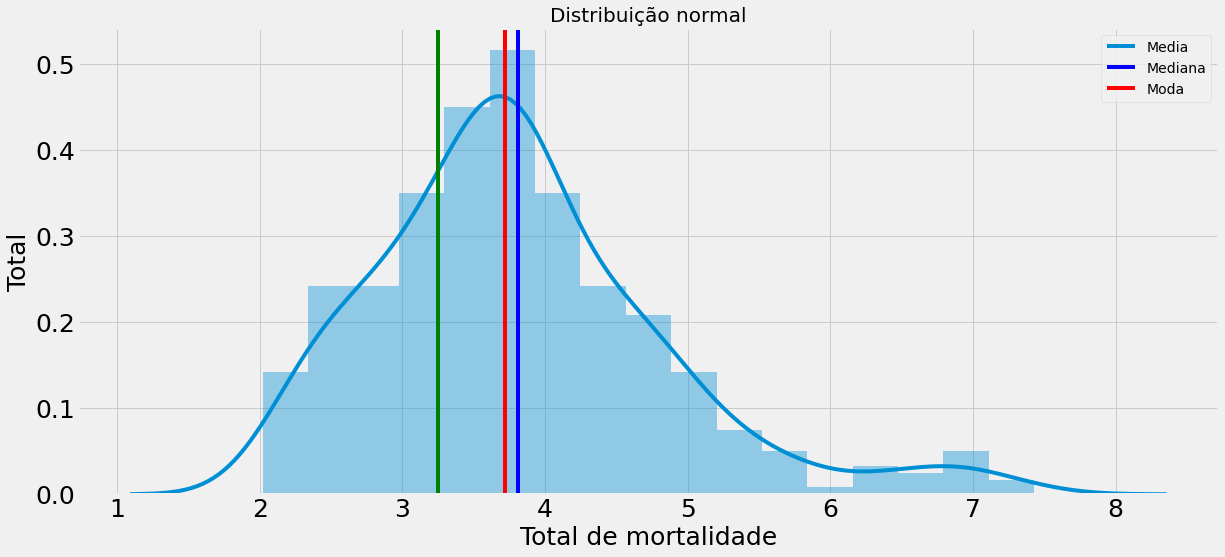

In [143]:
# Gráfico distribuição normal
plt.figure(figsize=(18.2, 8))

ax = sns.distplot(data_1['Taxa_mortalidade']);
plt.title("Distribuição normal", fontsize=20)
plt.xlabel("Total de mortalidade")
plt.ylabel("Total")
plt.axvline(data_1['Taxa_mortalidade'].mean(), color='b')
plt.axvline(data_1['Taxa_mortalidade'].median(), color='r')
plt.axvline(data_1['Taxa_mortalidade'].mode()[0], color='g');
plt.legend(["Media", "Mediana", "Moda"])
plt.show()

Text(0, 0.5, 'Valor total')

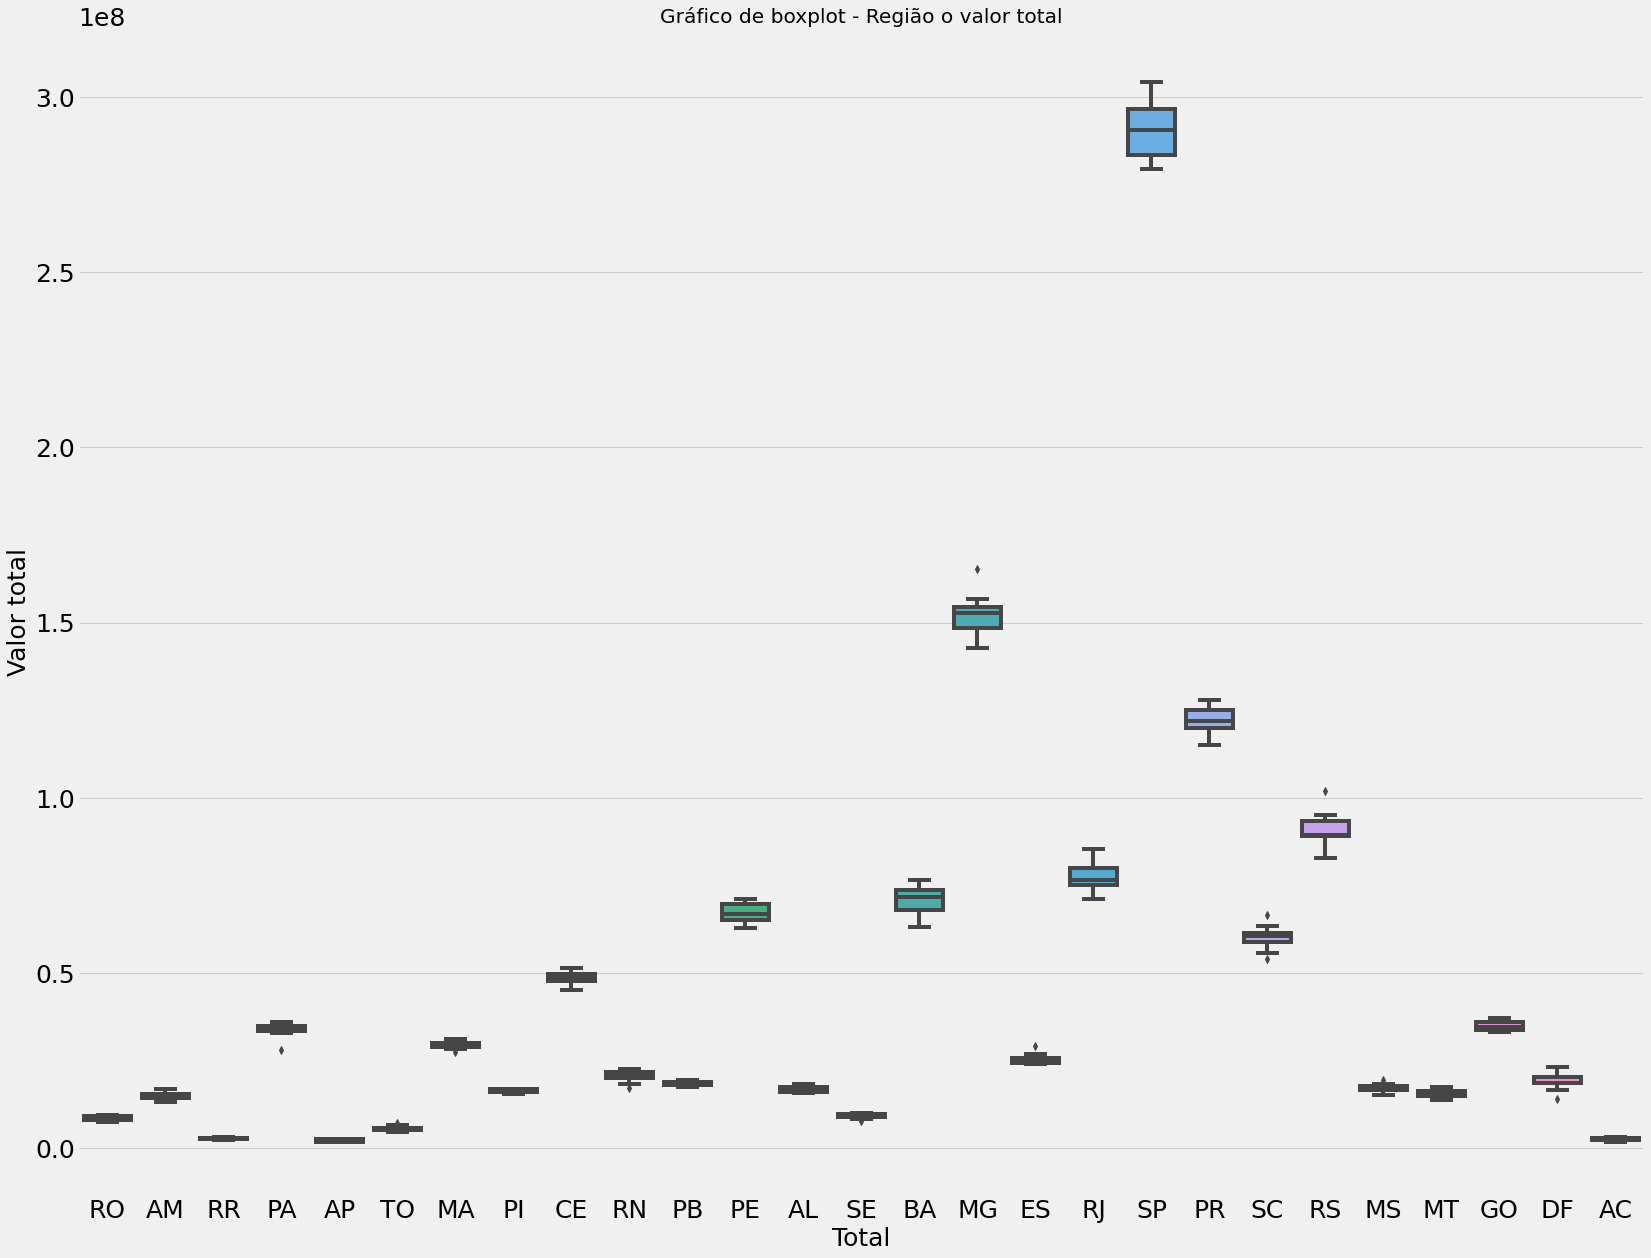

In [144]:
# Verificando os dados no boxplot região valor total verificando possíveis outliers

ax = sns.boxplot(x="Região", y="Valor_total", data = data_1)
plt.title("Gráfico de boxplot - Região o valor total")
plt.xlabel("Total")
plt.ylabel("Valor total")

In [145]:
# Cálculo da média de internações e óbitos

media_internações = data_1[['data', 'Internações']].groupby('data').mean()
media_obitos = data_1[["data", "Óbitos"]].groupby('data').mean()

print("Média de média internações", media_internações)
print()
print("Média de média óbitos", media_obitos)

Média de média internações              Internações
data                    
2017-12-01  34800.037037
2018-03-01  36823.037037
2018-04-01  37269.296296
2018-05-01  37718.703704
2018-07-01  37556.148148
2018-08-01  37785.925926
2018-09-01  36627.074074
2018-11-01  35867.518519
2018-12-01  34550.481481
2019-01-01  36314.666667
2019-02-01  35081.555556
2019-04-01  37520.925926
2019-06-01  37237.629630
2019-07-01  39158.653846

Média de média óbitos                  Óbitos
data                   
2017-12-01  1440.037037
2018-03-01  1499.629630
2018-04-01  1522.629630
2018-05-01  1574.370370
2018-07-01  1688.703704
2018-08-01  1650.000000
2018-09-01  1582.222222
2018-11-01  1484.370370
2018-12-01  1454.851852
2019-01-01  1635.148148
2019-02-01  1462.814815
2019-04-01  1548.370370
2019-06-01  1647.296296
2019-07-01  1804.769231


[Text(0.5, 1.0, 'Média móvel - Óbitos'),
 Text(0.5, 0, 'Anos'),
 Text(0, 0.5, 'Total de óbitos')]

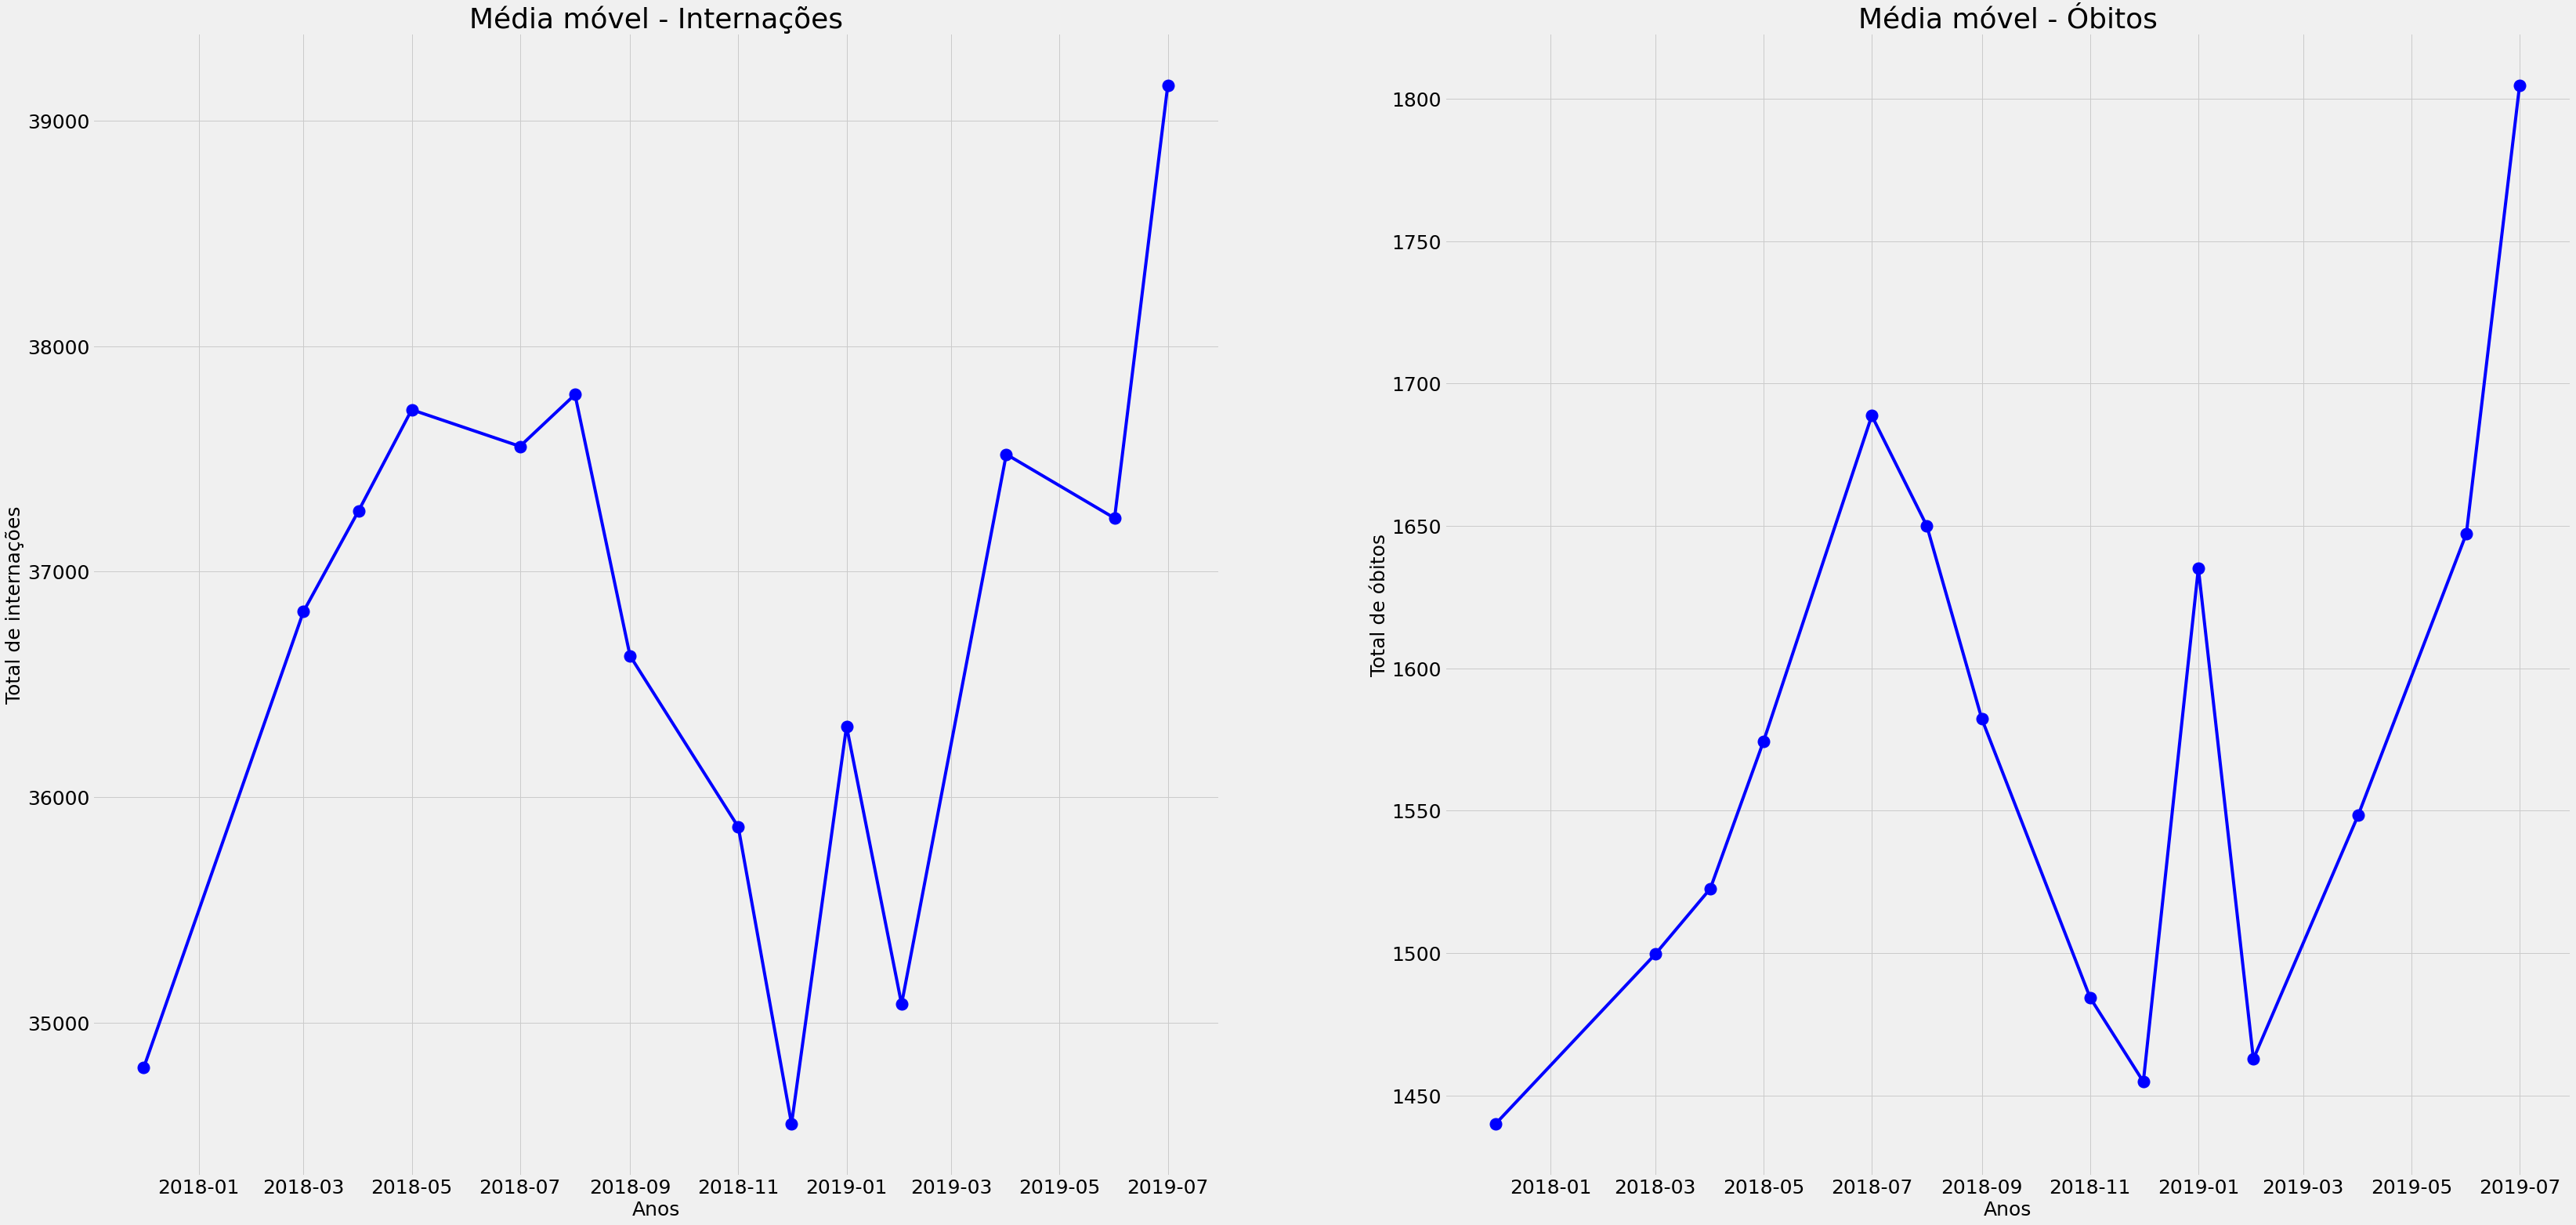

In [146]:
# Verificação média móvel de internações e óbitos

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50.5, 25));
plt.rcParams['font.size'] = '25'

ax1.plot(media_internações, marker='o', color = 'blue', markersize = 15);
ax1.set(title="Média móvel - Internações", xlabel = "Anos", ylabel = "Total de internações")
ax2.plot(media_obitos, marker='o', color = 'blue', markersize = 15);
ax2.set(title="Média móvel - Óbitos", xlabel="Anos", ylabel="Total de óbitos")

# 6.2) Matriz de correlação dos dados

In [147]:
# Matriz correlação de pares de colunas, excluindo NA / valores nulos.

corr = data_1.corr()
corr

,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade
Internações,1.000000,0.999923,0.989100,0.987972,0.991037,0.483613,0.494979,0.988890,0.102766,0.978980,0.401200
AIH_aprovadas,0.999923,1.000000,0.989185,0.988035,0.991175,0.481727,0.493456,0.989774,0.107036,0.980215,0.403680
Valor_total,0.989100,0.989185,1.000000,0.999926,0.998924,0.563165,0.573564,0.979871,0.127048,0.978965,0.445848
Valor_serviços_hospitalares,0.987972,0.988035,0.999926,1.000000,0.998399,0.566027,0.576296,0.979273,0.130085,0.978887,0.448936
Valor_serviços_profissionais,0.991037,0.991175,0.998924,0.998399,1.000000,0.557482,0.568247,0.979179,0.113203,0.975940,0.432267
Valor_médio_AIH,0.483613,0.481727,0.563165,0.566027,0.557482,1.000000,0.999104,0.482321,0.229847,0.498323,0.607948
Valor_médio_intern,0.494979,0.493456,0.573564,0.576296,0.568247,0.999104,1.000000,0.495777,0.241326,0.511975,0.620124
Dias_permanência,0.988890,0.989774,0.979871,0.979273,0.979179,0.482321,0.495777,1.000000,0.229501,0.994256,0.484849
Média_permanência,0.102766,0.107036,0.127048,0.130085,0.113203,0.229847,0.241326,0.229501,1.000000,0.247888,0.675840
Óbitos,0.978980,0.980215,0.978965,0.978887,0.975940,0.498323,0.511975,0.994256,0.247888,1.000000,0.532031


Text(0.5, 1.0, 'Matriz de correlação')

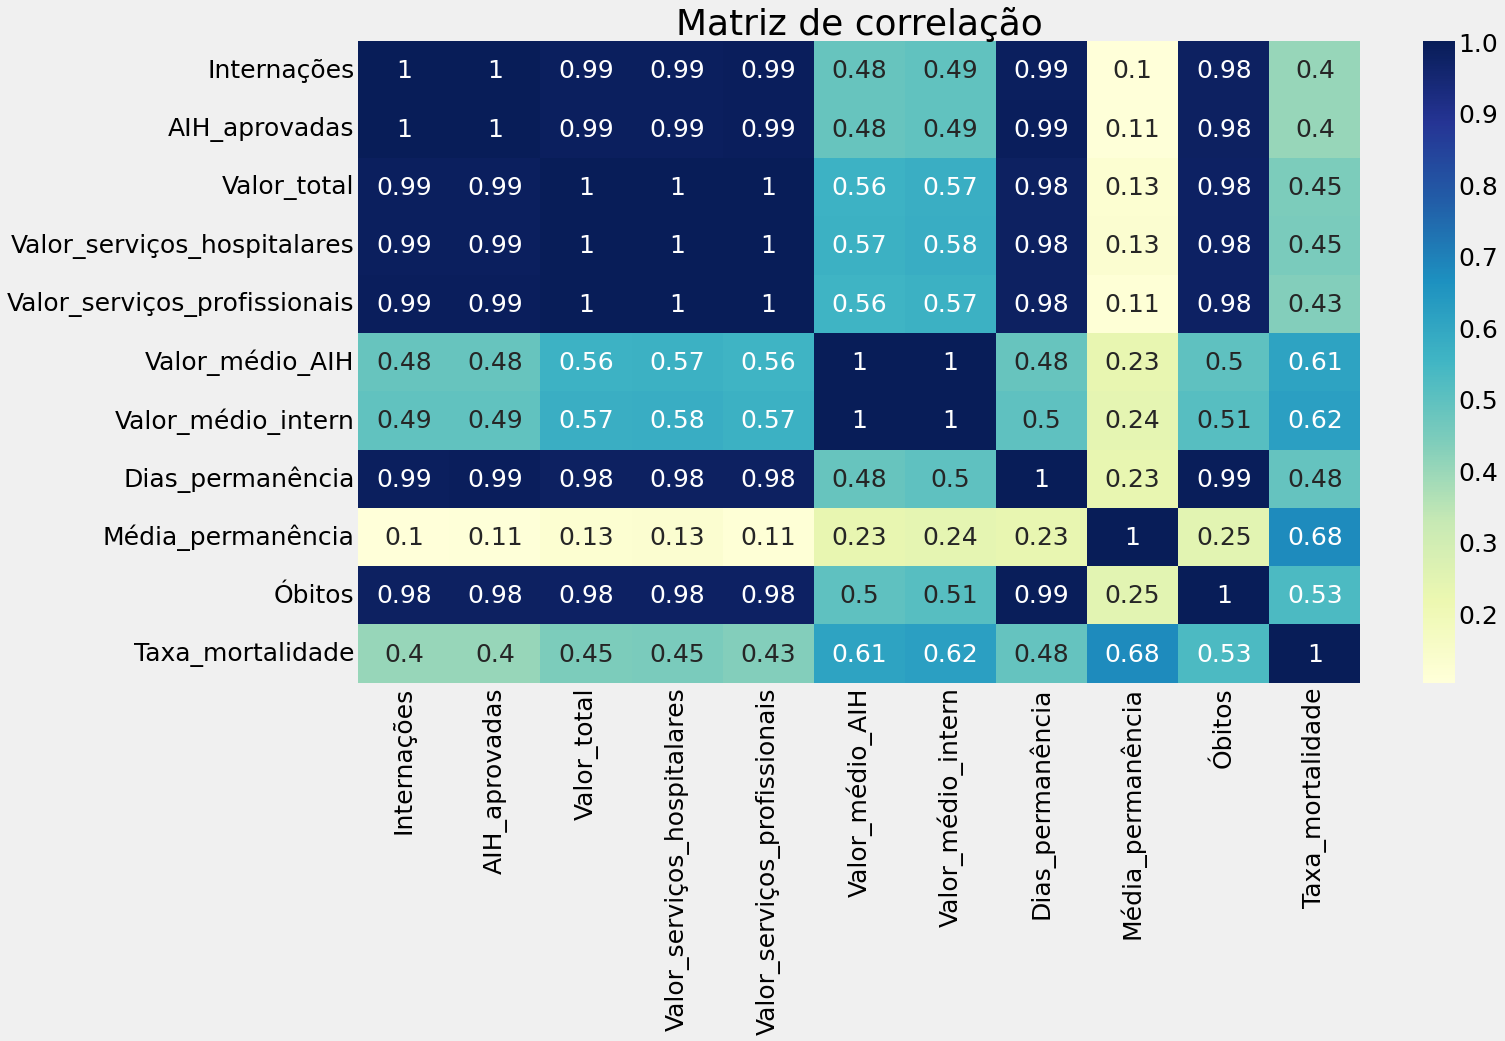

In [148]:
# Gráfico da matriz de correlação

plt.figure(figsize=(20,11))
ax = sns.heatmap(data_1.corr(), annot=True, cmap='YlGnBu');
plt.title("Matriz de correlação")

# 6.3) Análise de dados

- 2.1 - Análise 

In [149]:
# Verificando óbitos por ano com gráfico interativo 
fig = px.bar(data_1, x='ano', y='Óbitos', title='Óbitos por ano')
fig.show()

Text(0, 0.5, 'Total')

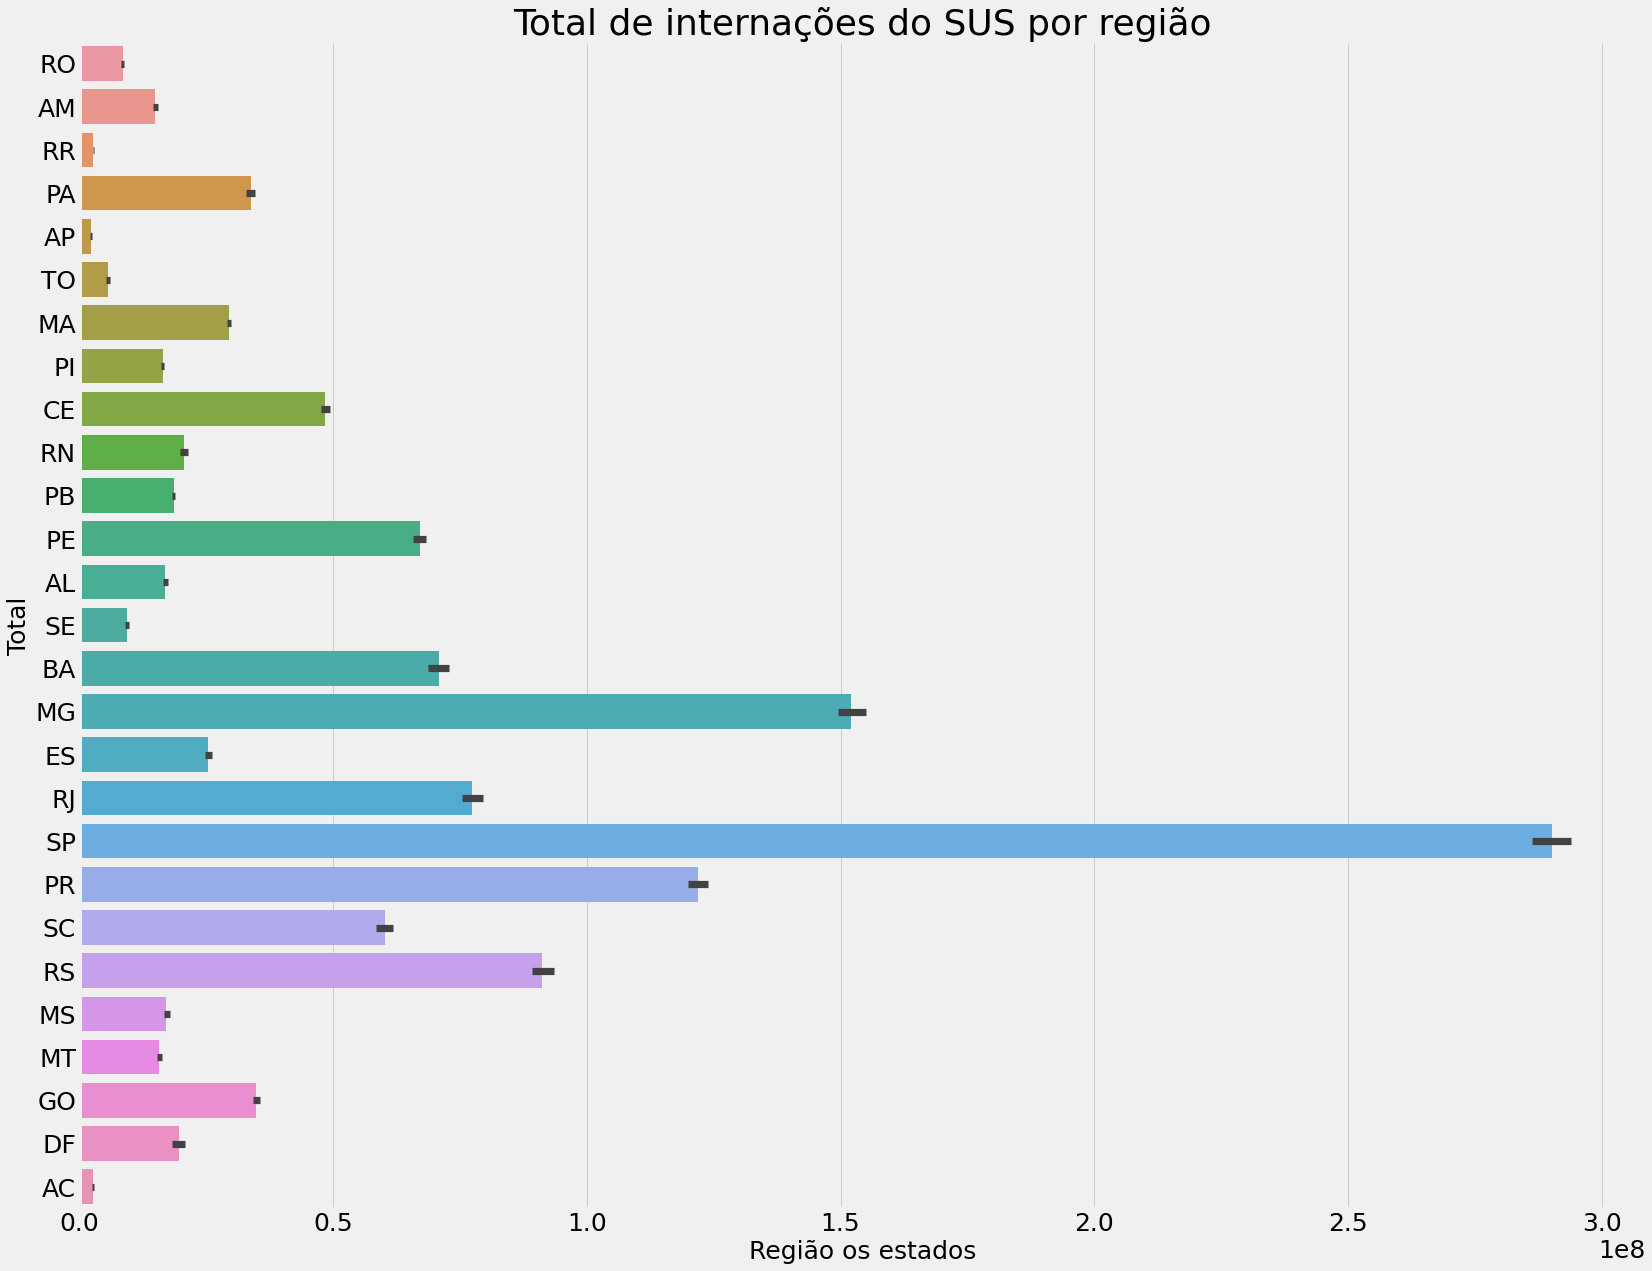

In [150]:
# Observando total de internações

sns.barplot(x='Valor_total', y='Região', data=data_1)
plt.title("Total de internações do SUS por região")
plt.xlabel("Região os estados")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

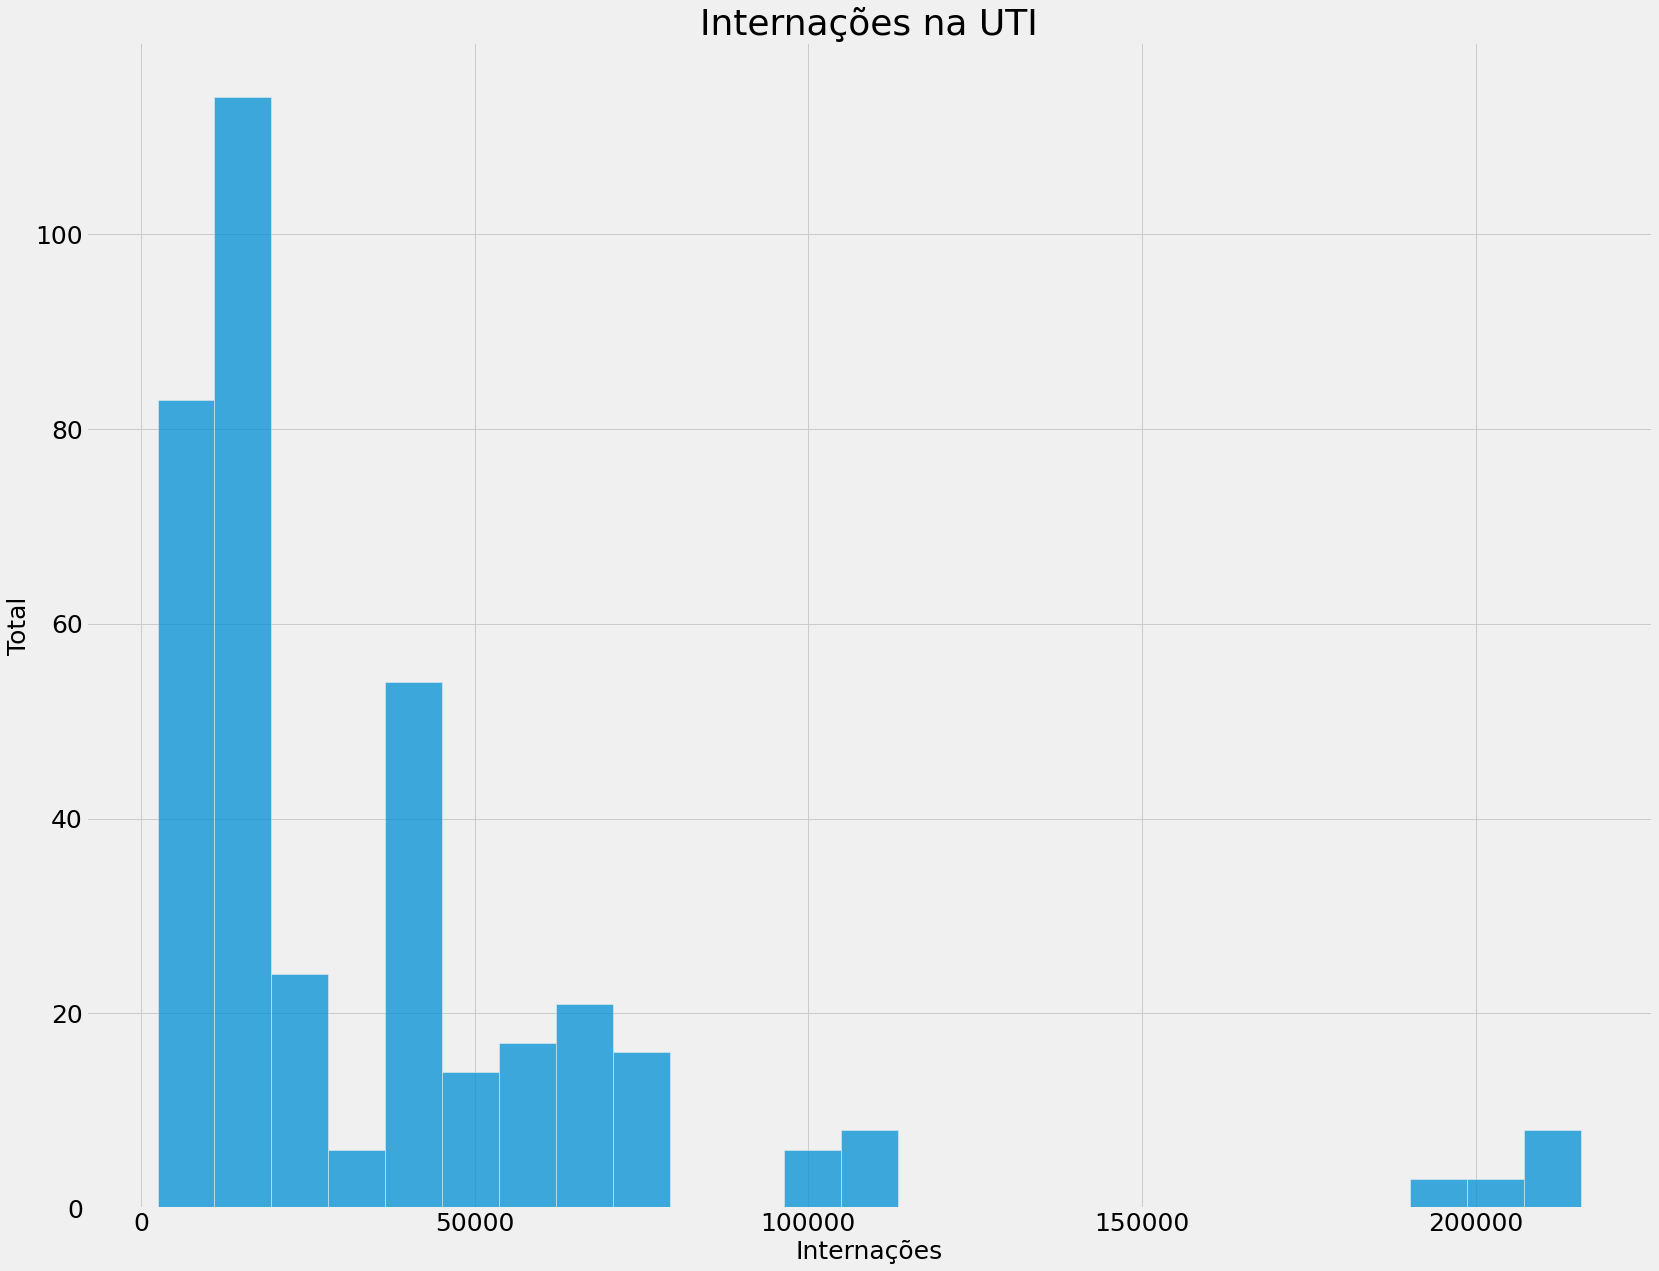

In [151]:
# Observando total de internações

sns.histplot(data_1["Internações"])
plt.title("Internações na UTI")
plt.xlabel("Internações")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

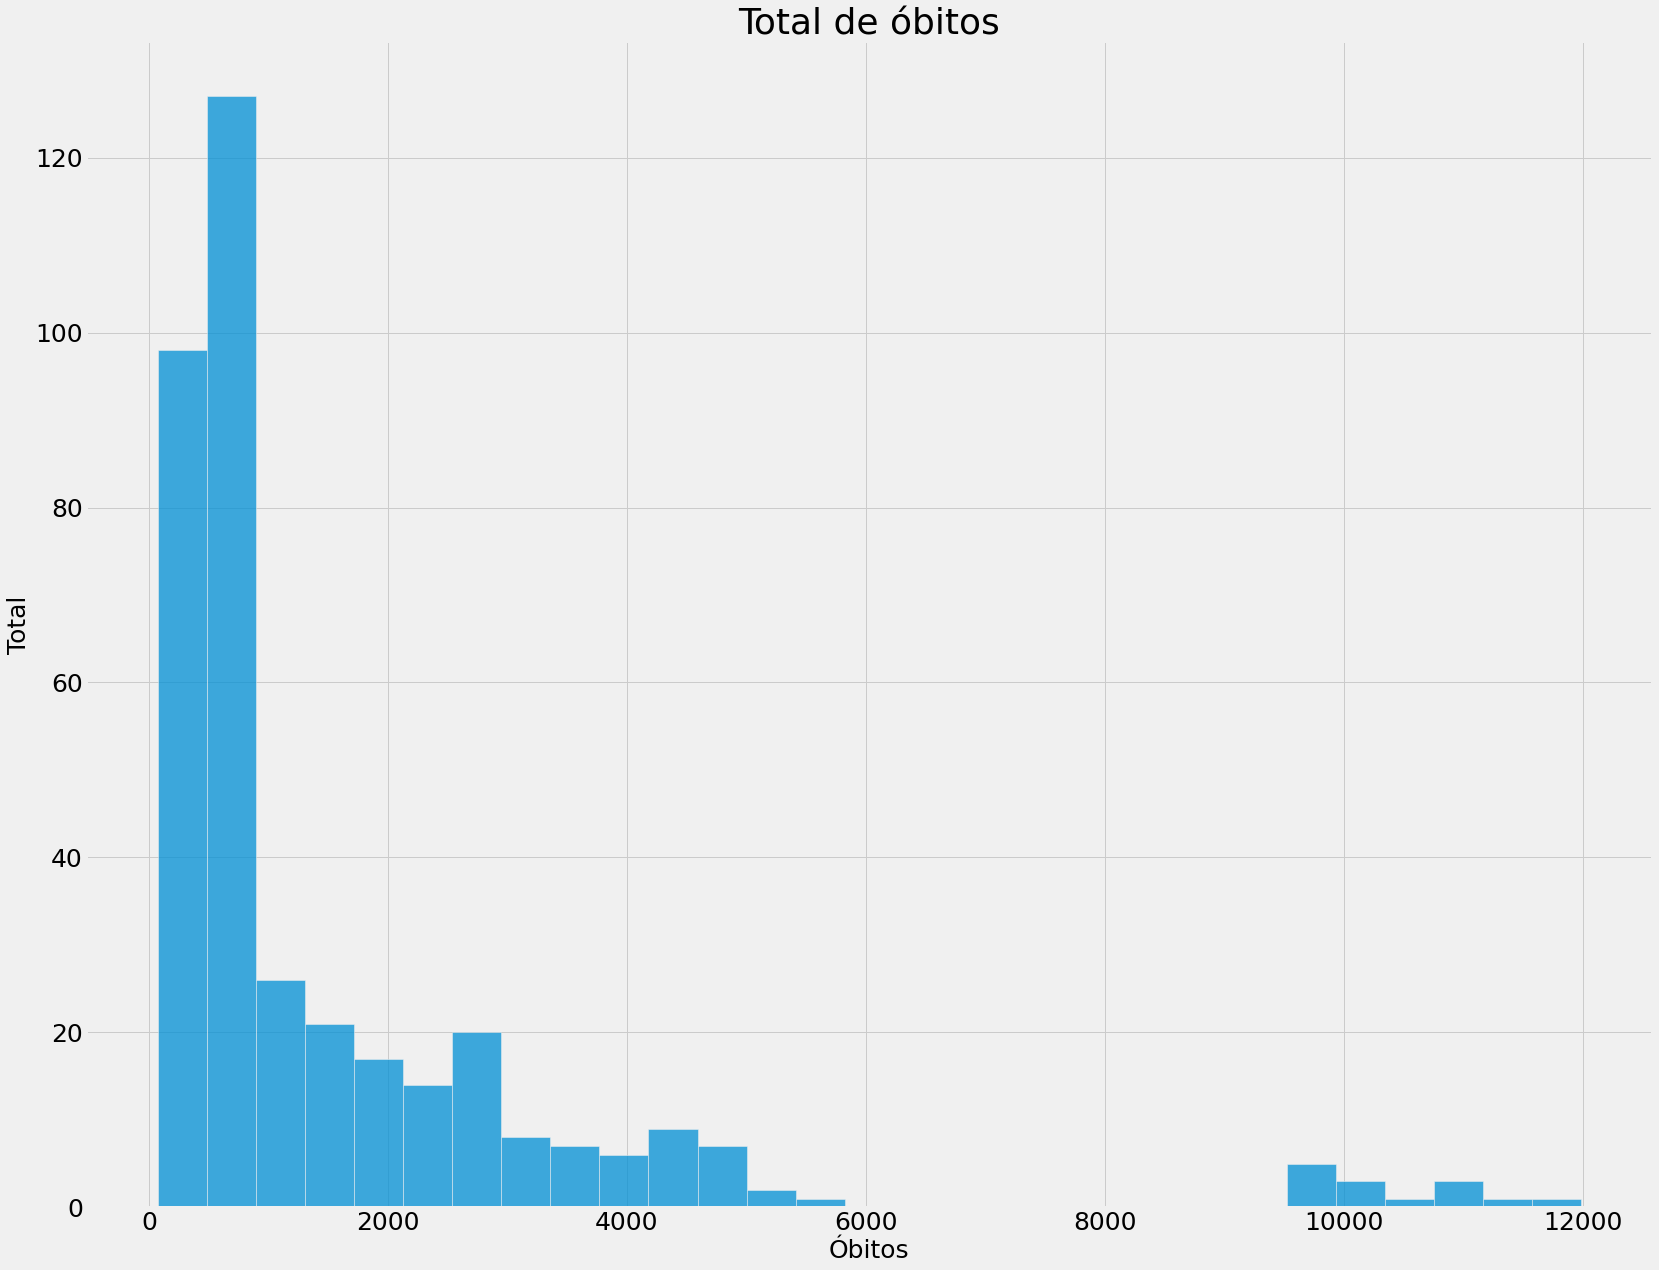

In [152]:
# Observando total de óbitos

sns.histplot(data_1["Óbitos"])
plt.title("Total de óbitos")
plt.xlabel("Óbitos")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

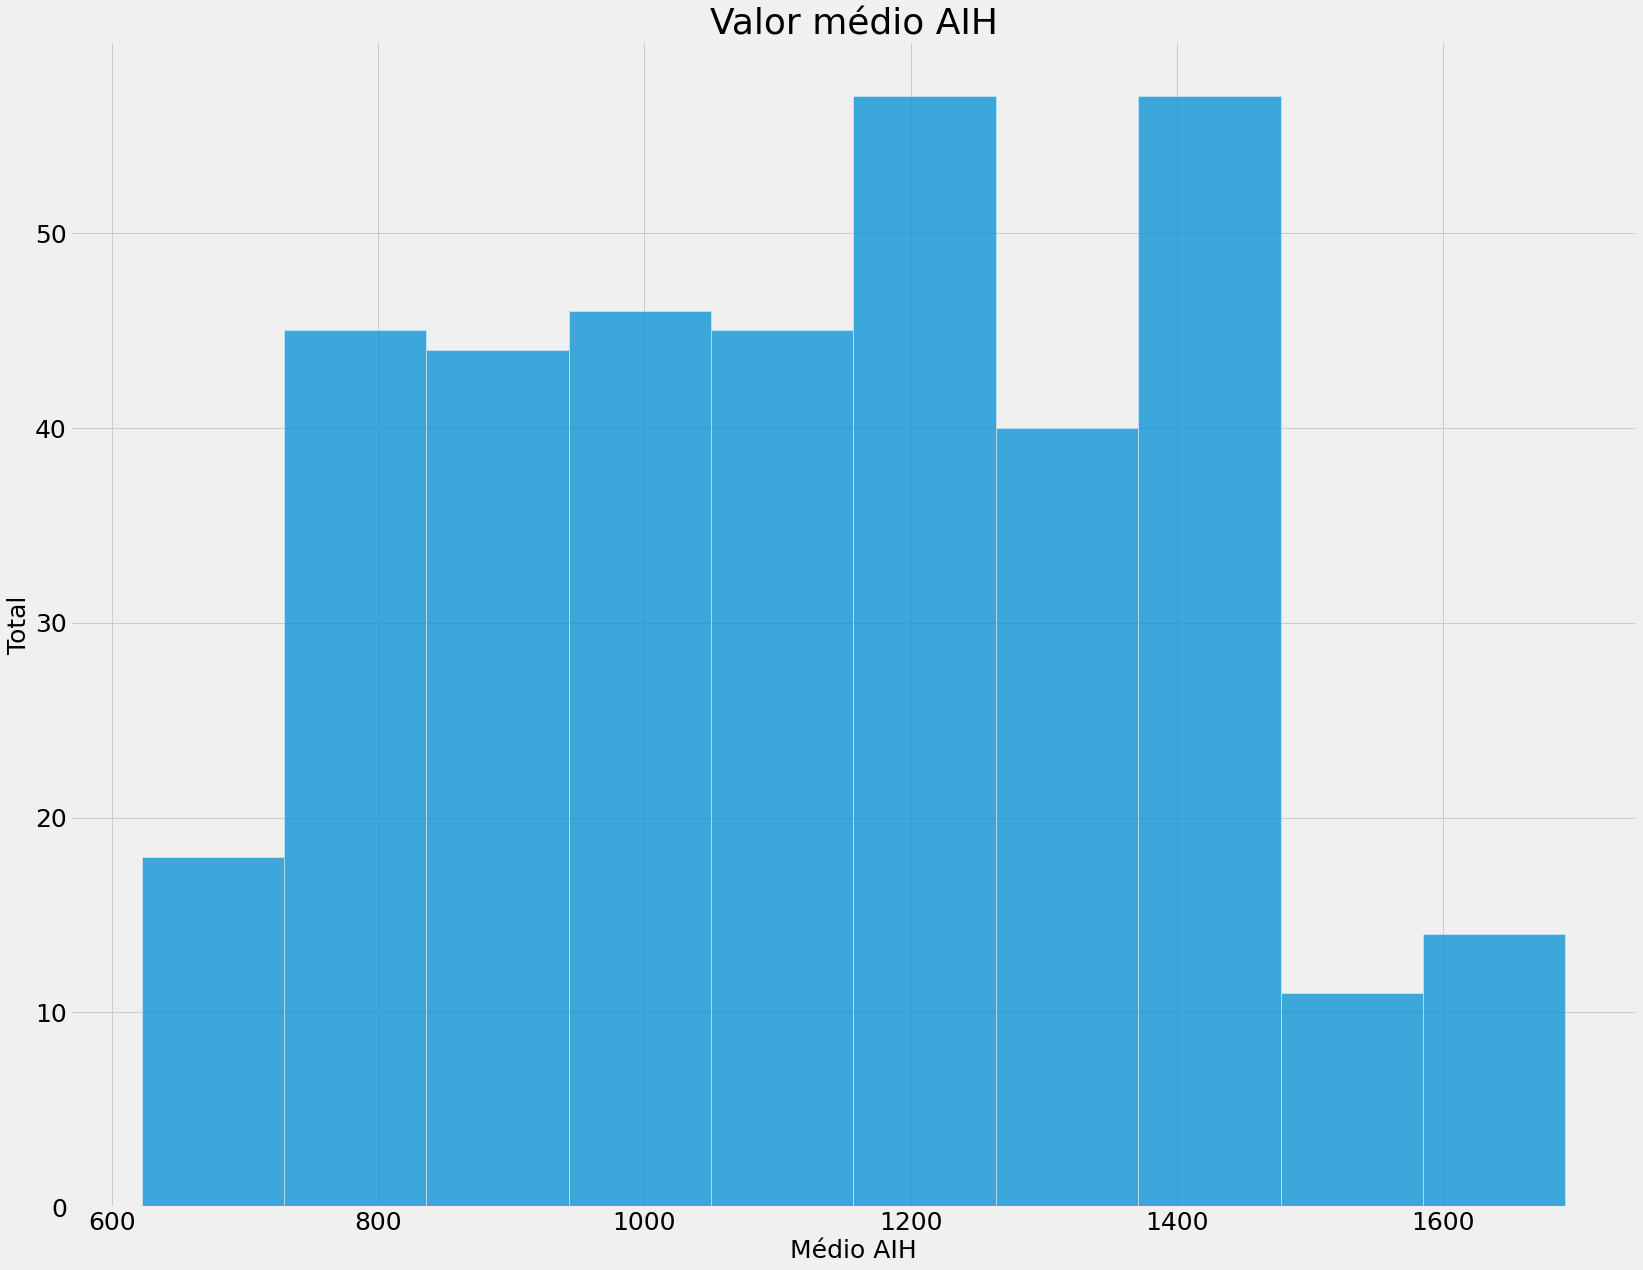

In [153]:
# Observando média do valor do AIH

sns.histplot(data_1["Valor_médio_AIH"])
plt.title("Valor médio AIH")
plt.xlabel("Médio AIH")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

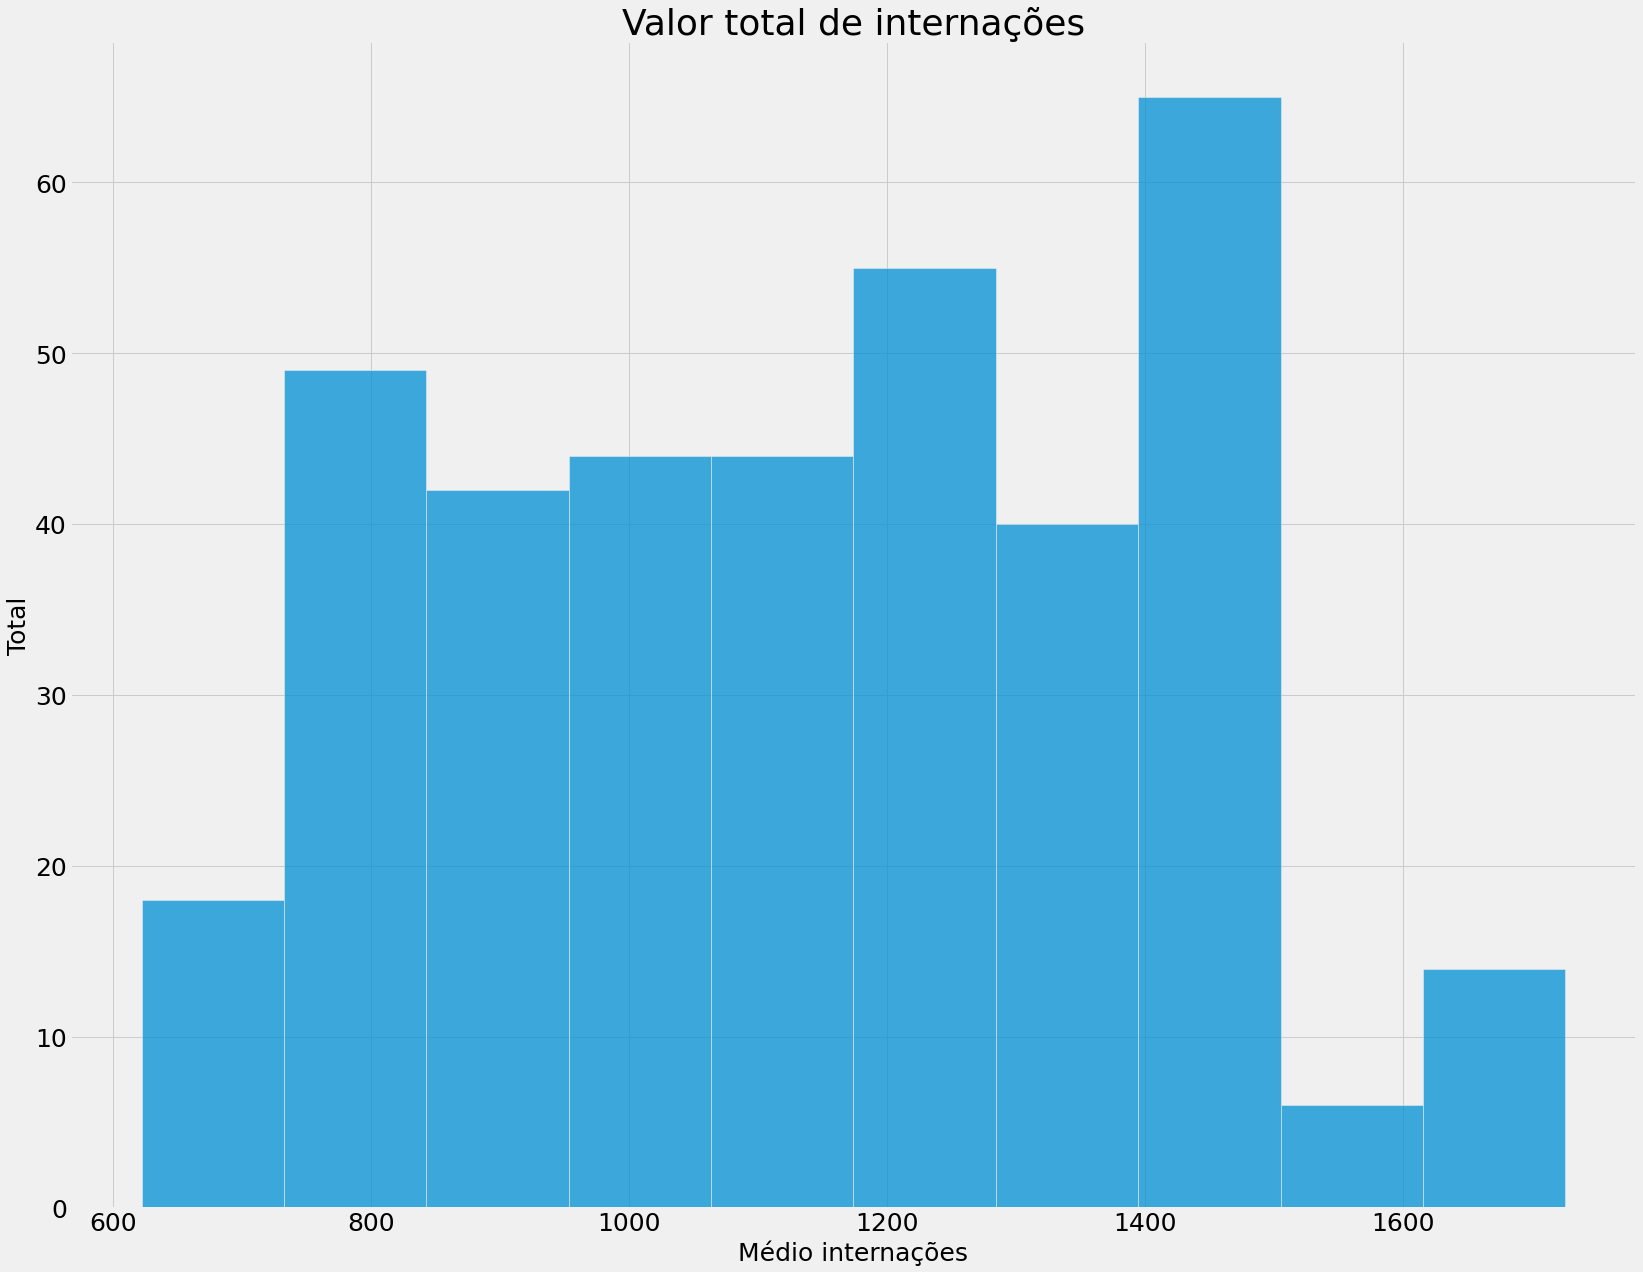

In [154]:
# Observando média de internações

sns.histplot(data_1["Valor_médio_intern"])
plt.title("Valor total de internações")
plt.xlabel("Médio internações")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

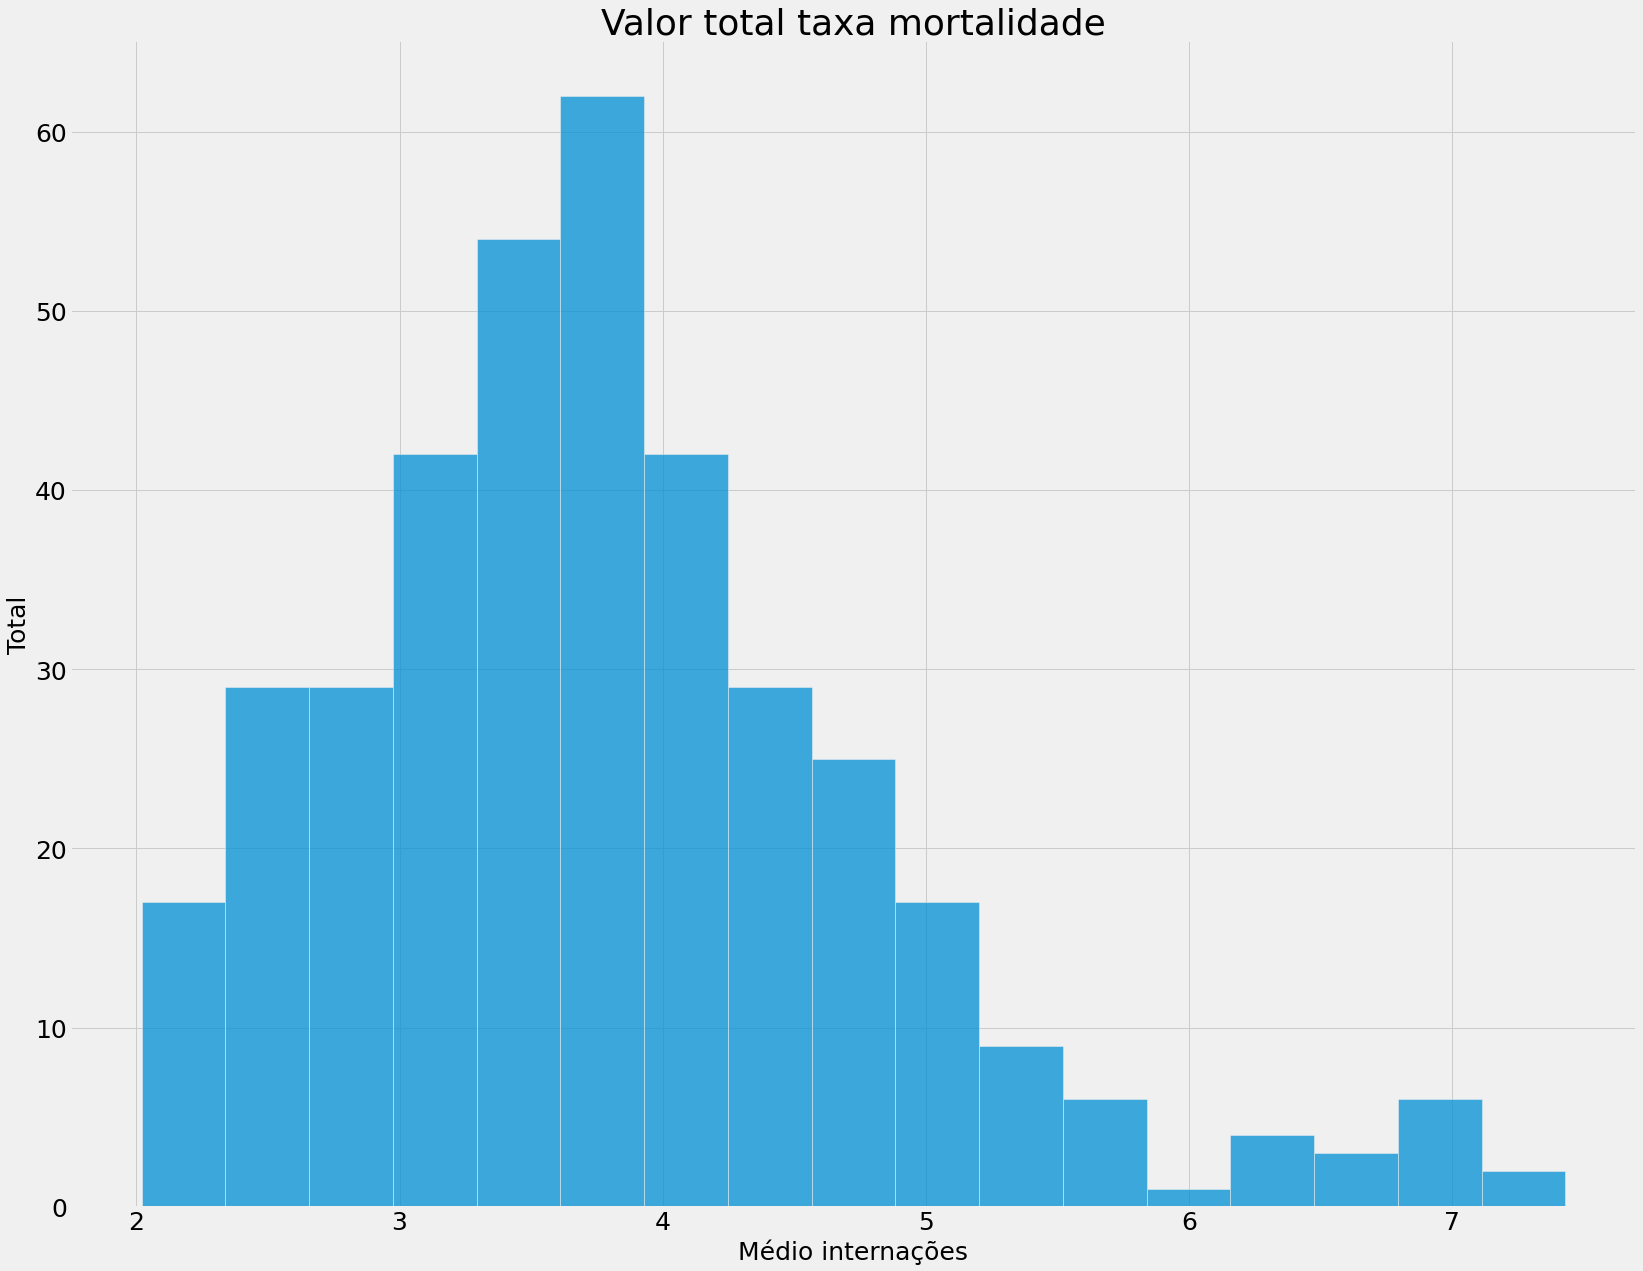

In [155]:
# Observando total da taxa de mortalidade

sns.histplot(data_1["Taxa_mortalidade"])
plt.title("Valor total taxa mortalidade")
plt.xlabel("Médio internações")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

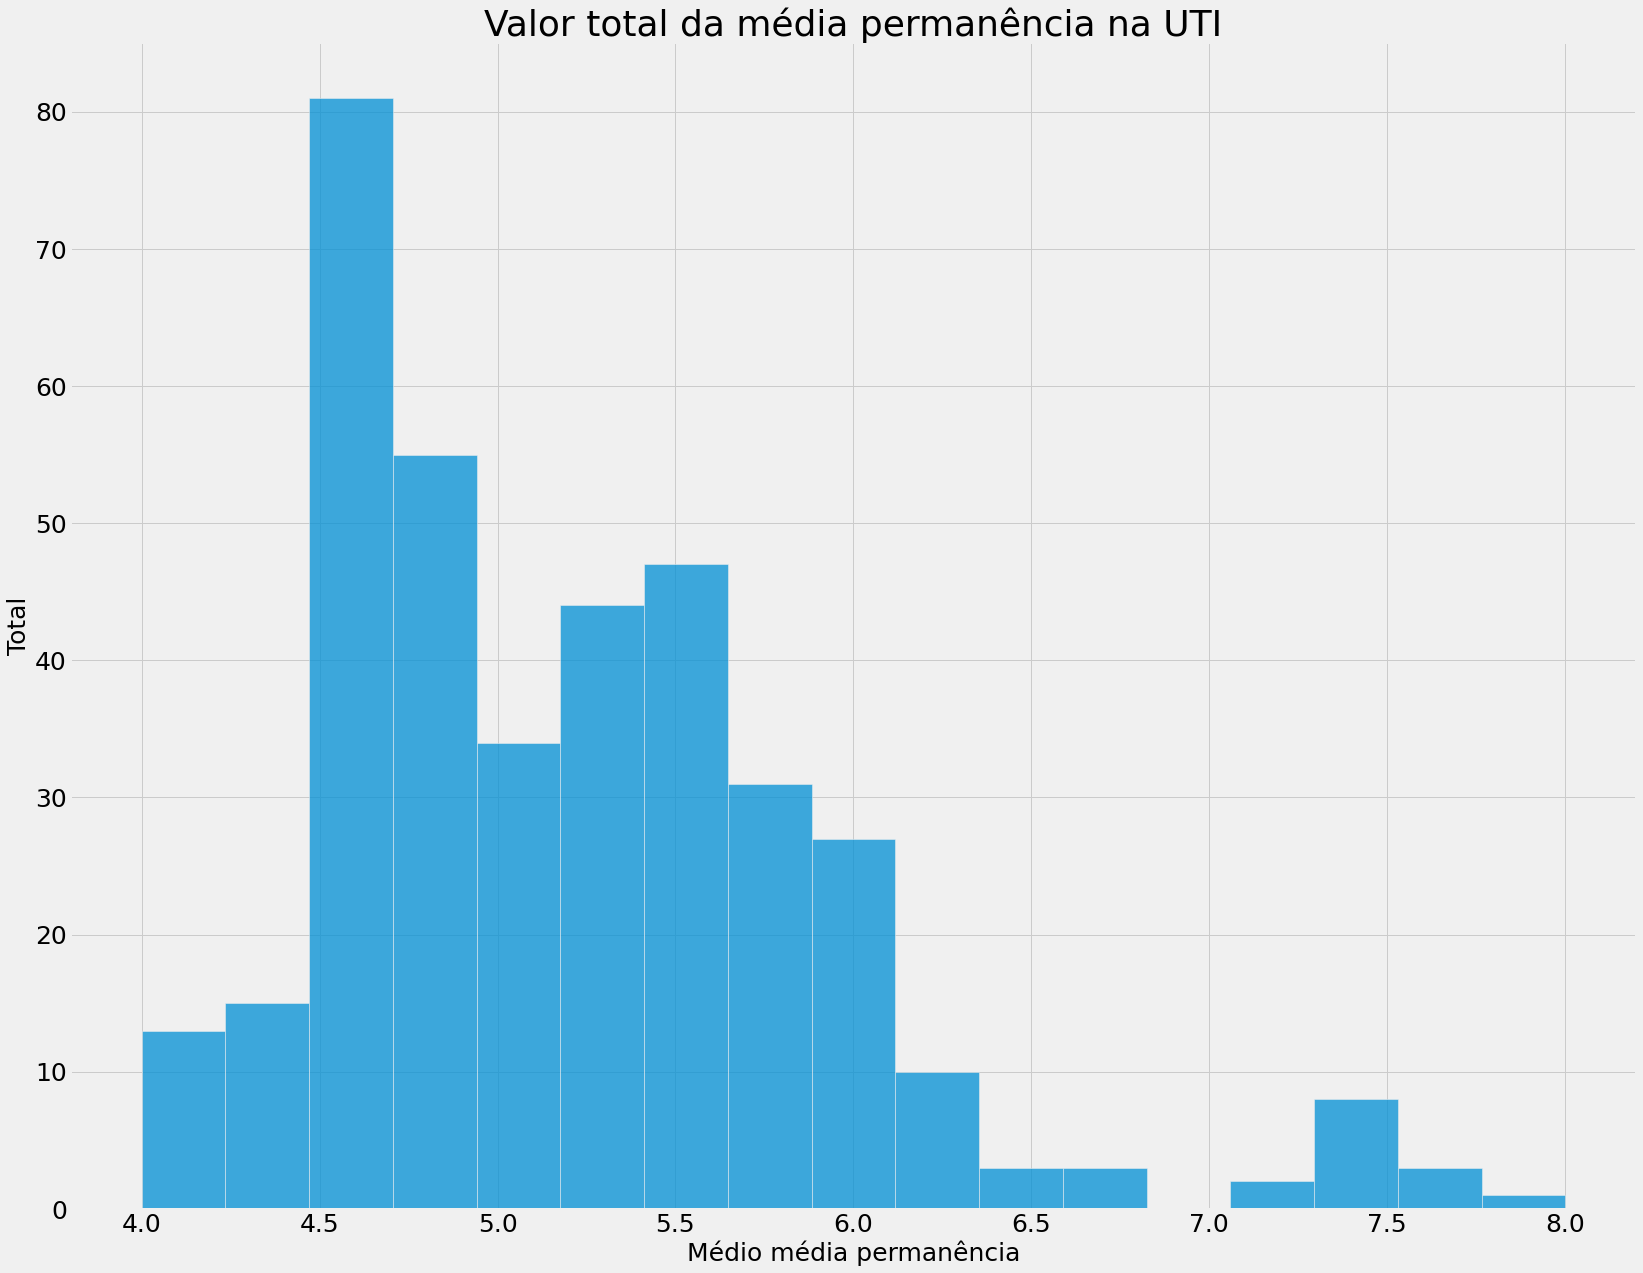

In [156]:
# Comparando permanência média da UTI

sns.histplot(data_1["Média_permanência"])
plt.title("Valor total da média permanência na UTI")
plt.xlabel("Médio média permanência")
plt.ylabel("Total")

Text(0, 0.5, 'Total')

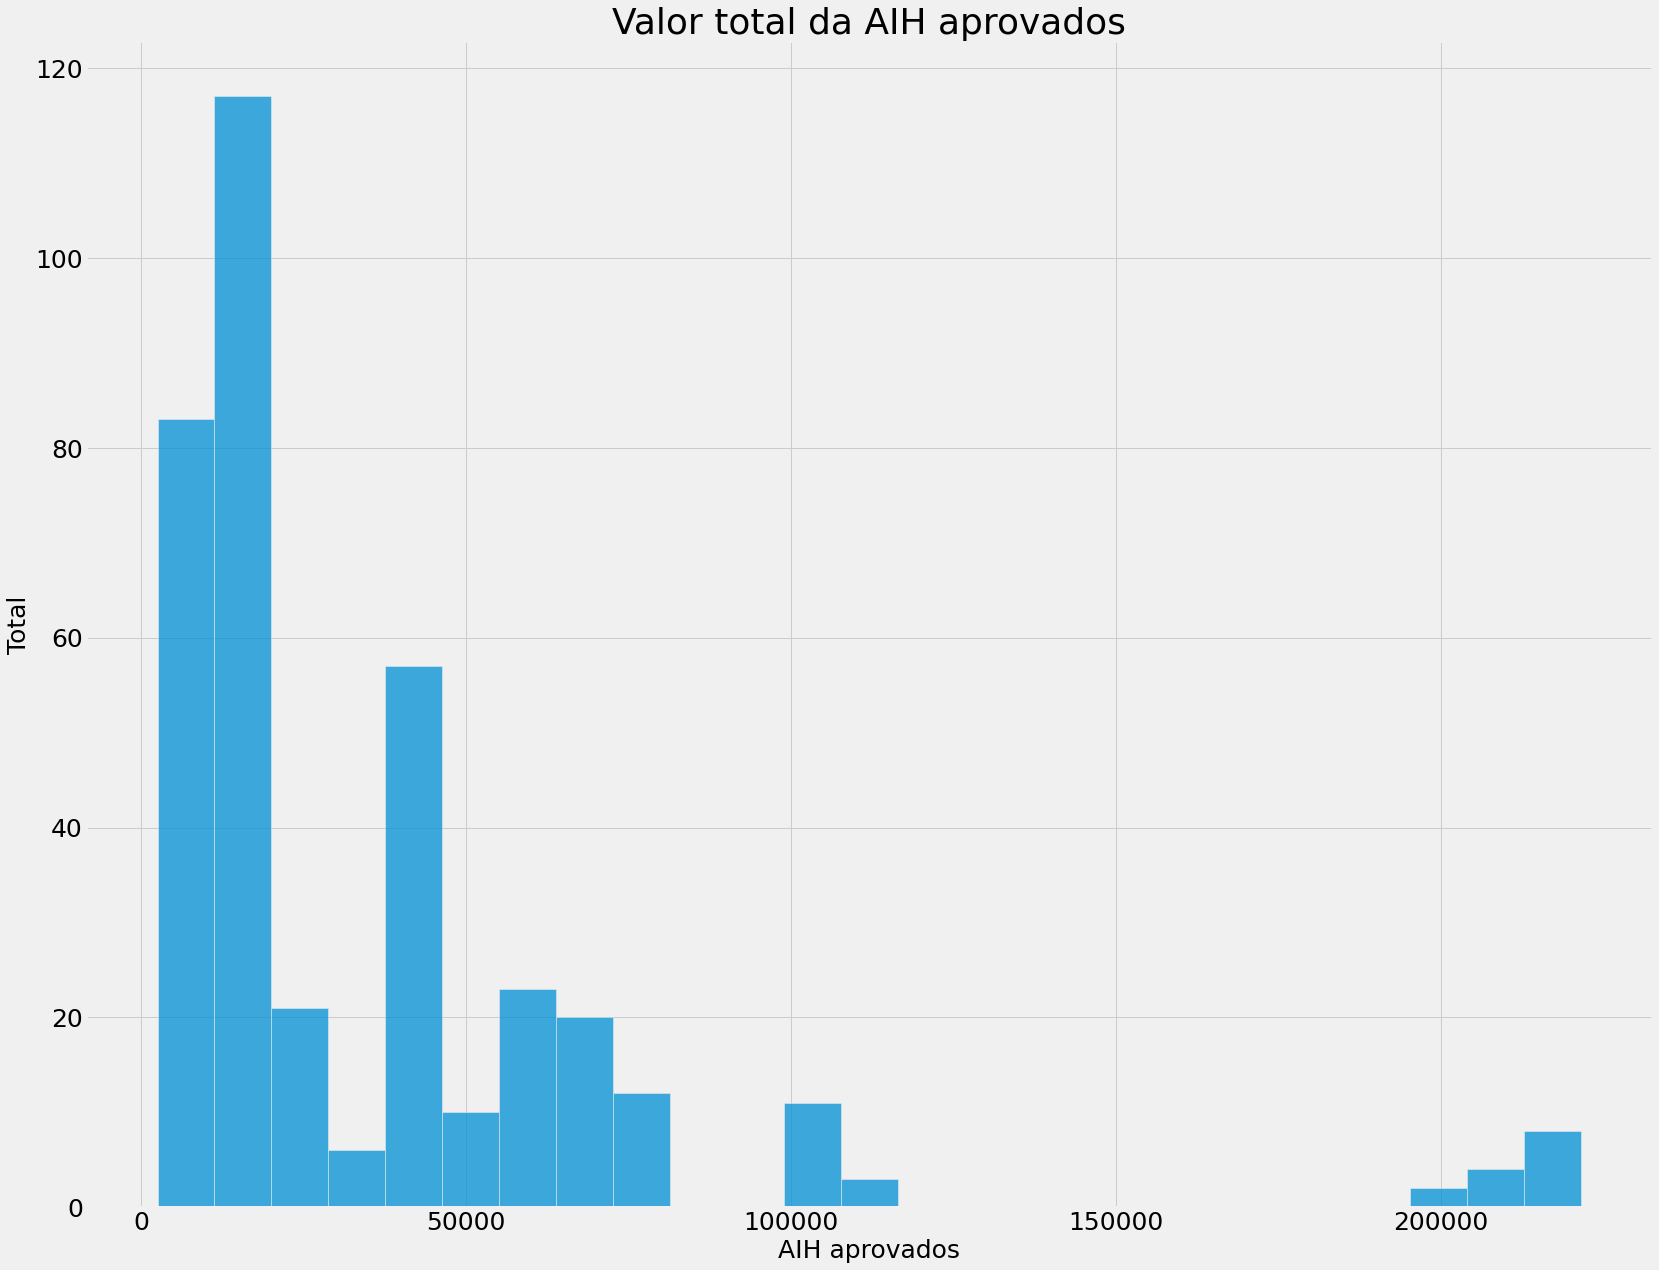

In [157]:
# Comparando o AIH de aprovados

sns.histplot(data_1["AIH_aprovadas"])
plt.title("Valor total da AIH aprovados")
plt.xlabel("AIH aprovados")
plt.ylabel("Total")

# 6.4) Análise de dados = Univariada

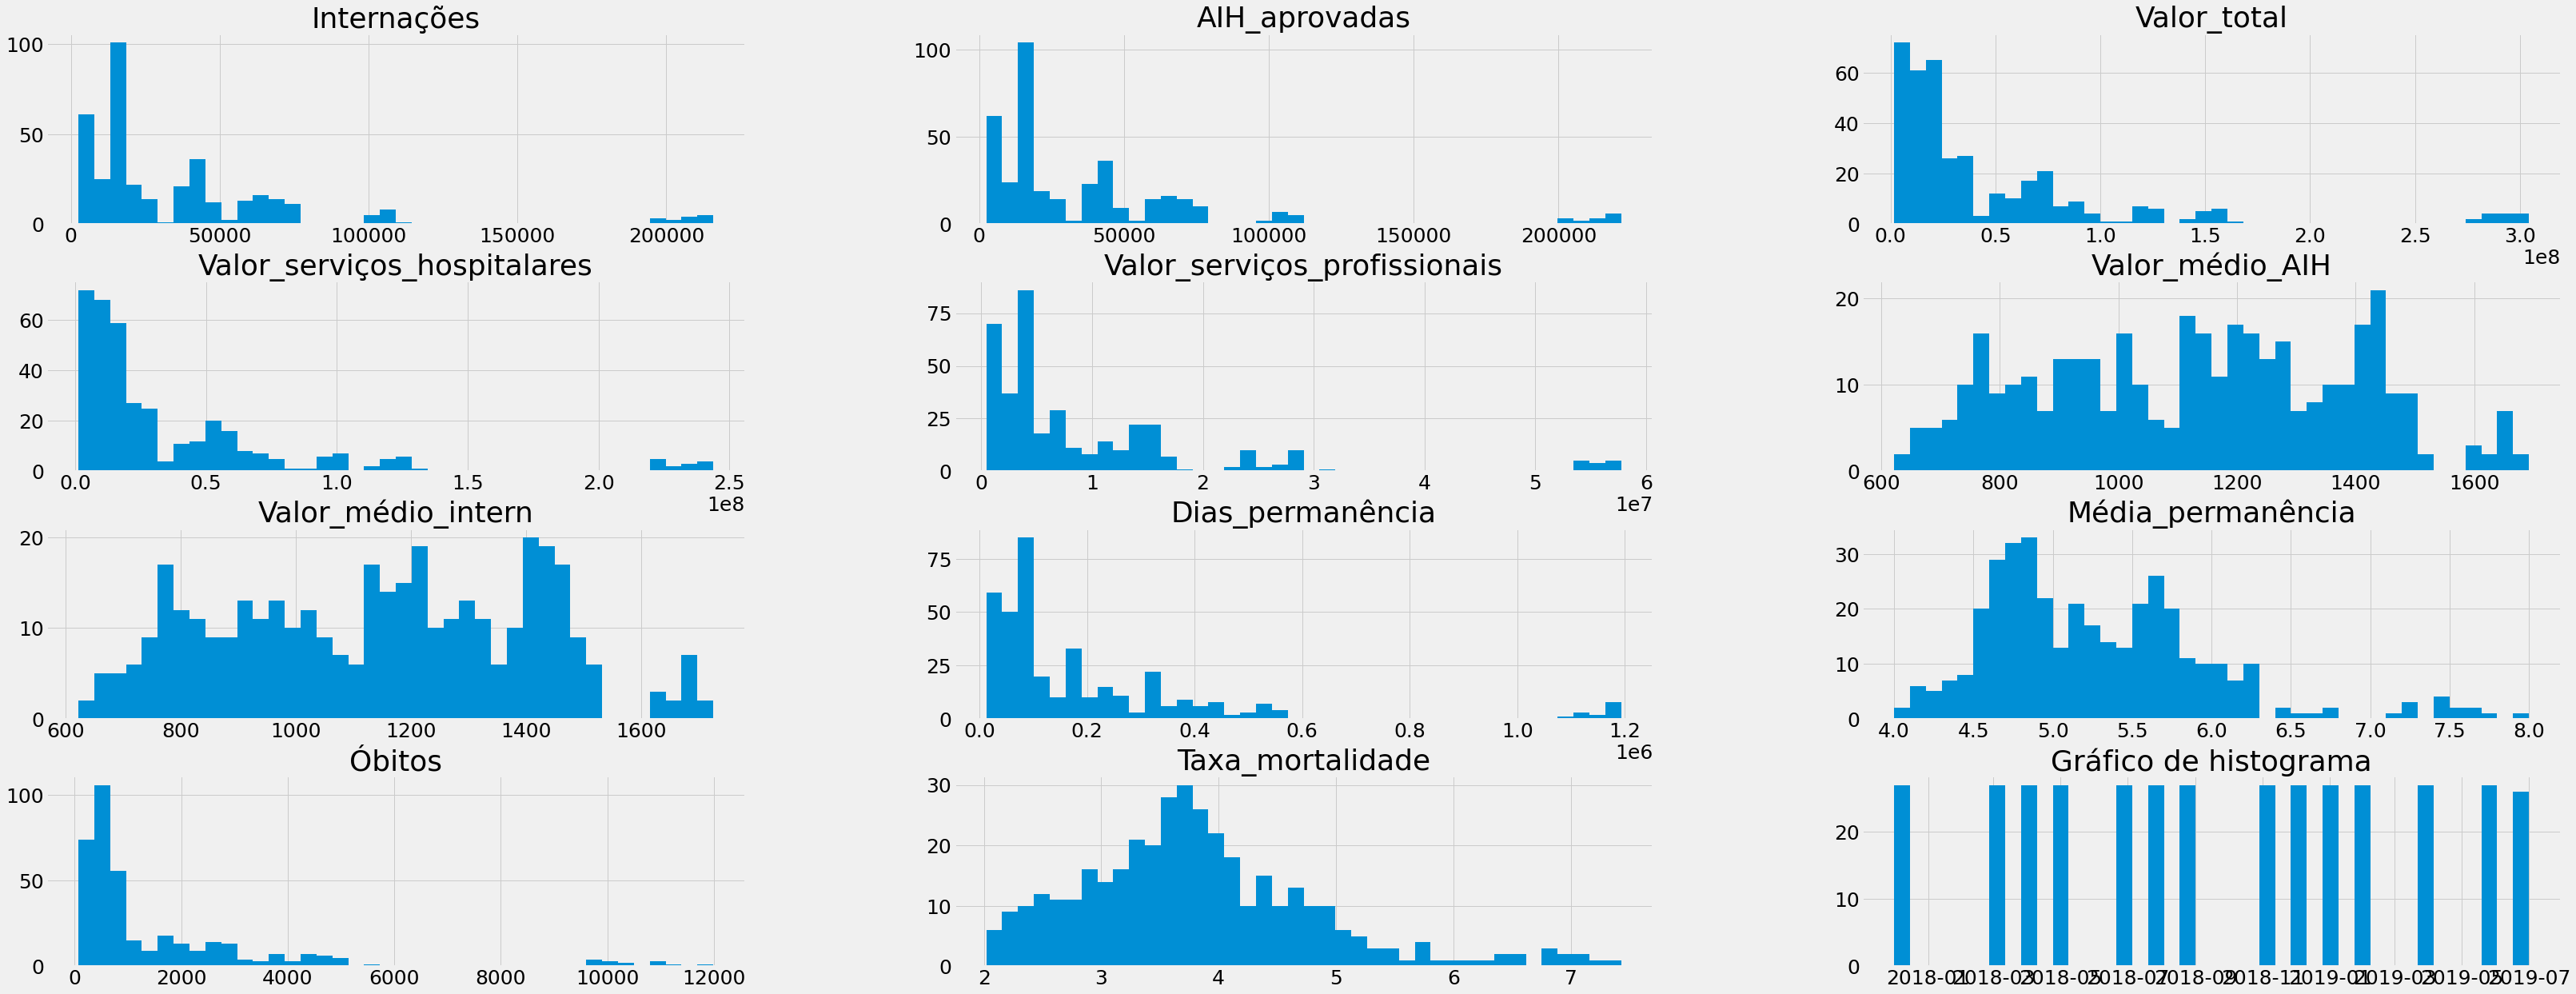

In [158]:
# Fazendo um comparativo dos dados 

data_1.hist(bins = 40, figsize=(50.2, 20))
plt.title("Gráfico de histograma")
plt.show()

# 6.5) Data Processing

**O processamento de dados começa com os dados em sua forma bruta e os converte em um formato mais legível (gráficos, documentos, etc.), dando-lhes a forma e o contexto necessários para serem interpretados por computadores e utilizados.**

- Exemplo: Uma letra, um valor numérico. Quando os dados são vistos dentro de um contexto e transmite algum significado, tornam-se informações.

In [159]:
# Limpeza dos dados
data_1.drop(columns=["Região", "data"], inplace = True)
data_1.head()

,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,mes,ano
1,9603.0,9603.0,9404751.41,7666945.90,1737805.51,979.36,979.36,53043.0,5.5,315.0,3.28,7,2019
2,16248.0,16248.0,15624312.73,12166634.07,3455637.92,961.61,961.61,85512.0,5.3,536.0,3.30,7,2019
3,4324.0,4324.0,3137537.40,2356231.68,781305.72,725.61,725.61,25560.0,5.9,171.0,3.95,7,2019
4,34774.0,34774.0,28178633.44,21241354.07,6581738.70,810.34,810.34,138135.0,4.0,832.0,2.39,7,2019
5,3407.0,3407.0,2380727.69,1776869.35,603858.34,698.78,698.78,18703.0,5.5,85.0,2.49,7,2019


In [160]:
# Mundando os tipo de dados de object para inteiros 

data_1['Óbitos'] = data_1['Óbitos'].astype(int)
data_1['Taxa_mortalidade'] = data_1['Taxa_mortalidade'].astype(int)
data_1['Internações'] = data_1['Internações'].astype(int)
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 1 to 31
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Internações                   377 non-null    int32  
 1   AIH_aprovadas                 377 non-null    float64
 2   Valor_total                   377 non-null    float64
 3   Valor_serviços_hospitalares   377 non-null    float64
 4   Valor_serviços_profissionais  377 non-null    float64
 5   Valor_médio_AIH               377 non-null    float64
 6   Valor_médio_intern            377 non-null    float64
 7   Dias_permanência              377 non-null    float64
 8   Média_permanência             377 non-null    float64
 9   Óbitos                        377 non-null    int32  
 10  Taxa_mortalidade              377 non-null    int32  
 11  mes                           377 non-null    object 
 12  ano                           377 non-null    object 
dtypes: flo

# 6.6) Feature Engineering

- Praticamente todos os algoritmos de Aprendizado de Máquina possuem entradas e saídas. As entradas são formadas por colunas de dados estruturados, onde cada coluna recebe o nome de feature, também conhecido como variáveis independentes ou atributos. Essas features podem ser palavras, pedaços de informação de uma imagem, etc. Os modelos de aprendizado de máquina utilizam esses recursos para classificar as informações. 

**Por exemplo, sedentarismo e fator hereditário são variáveis independentes para quando se quer prever se alguém vai ter câncer ou não**  

- As saídas, por sua vez, são chamadas de variáveis dependentes ou classe, e essa é a variável que estamos tentando prever. O nosso resultado pode ser 0 e 1 correspondendo a 'Não' e 'Sim' respectivamente, que responde a uma pergunta como: "Fulano é bom pagador?" ou a probabilidade de alguém comprar um produto ou não.

In [161]:
# Importando a biblioteca para pré-processamento 

from sklearn.preprocessing import LabelEncoder

for i in data_1.columns:
    if data_1[i].dtype==np.number:
        continue
    data_1[i]= LabelEncoder().fit_transform(data_1[i])
    
data_1.head(4)

,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,mes,ano
1,70,9603.0,9404751.41,7666945.90,1737805.51,979.36,979.36,53043.0,5.5,60,1,8,2
2,159,16248.0,15624312.73,12166634.07,3455637.92,961.61,961.61,85512.0,5.3,114,1,8,2
3,37,4324.0,3137537.40,2356231.68,781305.72,725.61,725.61,25560.0,5.9,41,1,8,2
4,220,34774.0,28178633.44,21241354.07,6581738.70,810.34,810.34,138135.0,4.0,184,0,8,2


# 6.7) Treino e Teste

- Treino e teste da base de dados da coluna Internações

In [162]:
y = data_1['Internações'] # Variável para teste
x = data_1.drop('Internações', axis=1) # Variável para treino

In [163]:
# Total de linhas e colunas dados variável x
x.shape

(377, 12)

In [164]:
# Total de linhas e colunas dados variável y
y.shape

(377,)

# 6.8) - Escalonamento

- Escalonamento uma forma de contornar os problemas relacionados à escala, mantendo a informação estatística dos dados. O procedimento consiste em realizar uma transformação sobre o conjunto original dos dados de modo que cada variável apresente média zero e variância unitária.

In [165]:
# Importando a biblioteca sklearn para o escalonamneto dos dados

from sklearn.preprocessing import StandardScaler 

scaler_pre = StandardScaler() # Inicializando o escalonamento
scaler_pre_fit_train = scaler_pre.fit_transform(x) # Treinamento com a função fit_transform com a variável x
scaler_pre_fit_train # Imprimindo o valor do escalonamento

array([[-0.646678  , -0.62641762, -0.61761819, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.49147487, -0.52357938, -0.52470231, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.76997632, -0.73004379, -0.72728127, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       ...,
       [-0.5256219 , -0.52956897, -0.52281759, ...,  0.68990214,
        -0.65879474,  1.21666066],
       [-0.24861526, -0.22636185, -0.22618578, ..., -0.2878915 ,
        -0.65879474,  1.21666066],
       [-0.4388296 , -0.47609154, -0.47083944, ..., -1.26568513,
        -0.65879474,  1.21666066]])

# 6.9) Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [166]:
# Importação da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, # Variável x
                                                    y, # Variável y
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [167]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train.shape

(301, 12)

In [168]:
# Total de linhas dos dados de treino y

y_train.shape

(301,)

In [169]:
# Total de linhas e colunas dos dados de treino x teste 

x_test.shape

(76, 12)

In [170]:
# Total de linhas e colunas dos dados de treino y teste 

y_test.shape

(76,)

# 7.0) Modelo machine learning 

Eu utlizei modelo de regressão linear para prever internações, óbitos e valor médio de AIH.

# 7.1) Modelo 01 - Regressão linear

- Nesse modelo estamos prevendo o número de internações utilizando modelo de regressão linear.

In [171]:
# Modelo regressão linear - 1
# Importação da biblioteca sklearn o modelo regressão linear

from sklearn.linear_model import LinearRegression 

# Nome do algoritmo M.L
model_linear = LinearRegression() 

# Treinamento do modelo
model_linear_fit = model_linear.fit(x_train, y_train)

# Score do modelo
model_linear_score_1 = model_linear.score(x_train, y_train)

print("Modelo - Regressão linear: %.2f" % (model_linear_score_1 * 100))

Modelo - Regressão linear: 97.19


In [172]:
# Previsão do modelo

model_linear_pred = model_linear.predict(x_test)
model_linear_pred

array([ 84.40857132, 159.4471439 , 117.96931437,  38.85839447,
        76.63184024, 179.07647206, 164.28060009,  27.02574605,
        93.13339512, 161.27789353,  56.64496633, 311.16204556,
       215.79340345,  43.76291827, 222.20098771, 168.72730908,
        21.25243806, 254.50818995, 120.01348641, 150.63262799,
       256.78178152, 165.5427963 , 152.98114868, 166.89643437,
       268.22610548, 202.02451447,  58.63318032, 120.93907933,
       230.93071465, 131.76209748, 118.61089128, 278.77287519,
       279.6566859 , 136.46681564,  78.91651257, 184.38180395,
       147.80902361, 165.1144754 , 178.91802741,  68.29004134,
       257.95997368, 314.57437335, 126.85670271, 286.02938697,
       362.00586514, 363.77835419, 125.71364954, 213.47871388,
        50.6312543 , 304.44944686,  51.205695  , 109.36292527,
       359.15692347, 350.58257403,  64.21951213, 277.63566797,
        60.64652212, 266.989199  , 121.42702282, 220.14533771,
       213.95367746, 118.40805164, 296.92540793, 319.20

In [173]:
# O intercepto representa o efeito médio em tendo todas as variáveis explicativas excluídas do modelo. 
# De forma mais simples, o intercepto representa o efeito médio em são iguais a zero.

model_linear.intercept_

-13.597752197060345

In [174]:
# Os coeficientes de regressão  𝛽2 ,  𝛽3  e  𝛽4  são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares. 
# Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte

model_linear.coef_

array([ 3.00648322e-05, -1.73379674e-06,  5.15814084e-07,  8.23195727e-06,
        5.86211719e-01, -5.86970449e-01, -3.98056909e-05,  6.38585144e+00,
        1.13200146e+00, -1.68474219e+01,  3.93683409e-01, -3.91170149e+00])

In [175]:
# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. 
# É um valor entra 0 e 1.

print('R² = {}'.format(model_linear.score(x_train, y_train).round(2)))

R² = 0.97


In [176]:
# Previsão do modelo 
pred = model_linear.predict(x_train)
pred2 = y_train - pred
pred2

21     6.975443
20    11.304725
1     -0.208314
12   -16.308419
2      5.743886
        ...    
1      9.805935
5     -6.357144
12     4.337315
25     8.380661
13    -1.309435
Name: Internações, Length: 301, dtype: float64

# Gráfico de regressão linear

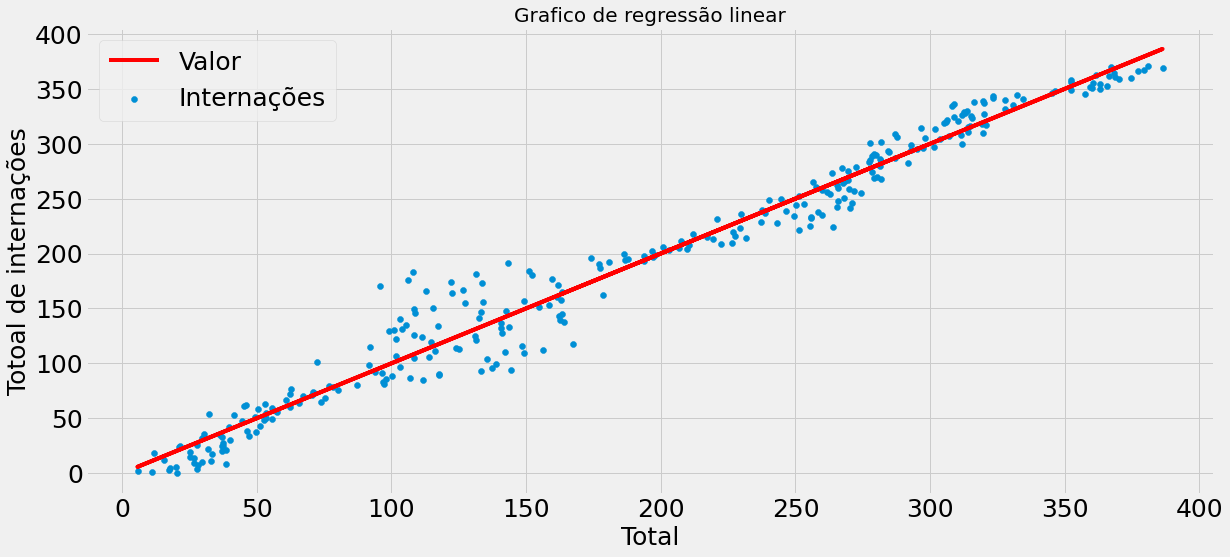

In [177]:
# Grafico de regressão linear

plt.figure(figsize=(18, 8))
plt.scatter(pred, y_train)
plt.plot(pred, model_linear.predict(x_train), color = "red")
plt.title("Grafico de regressão linear", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Totoal de internações")
plt.legend(["Valor", "Internações"])

# 7.2) Distribuição de Frequências dos Resíduos

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Internações', ylabel='Density'>

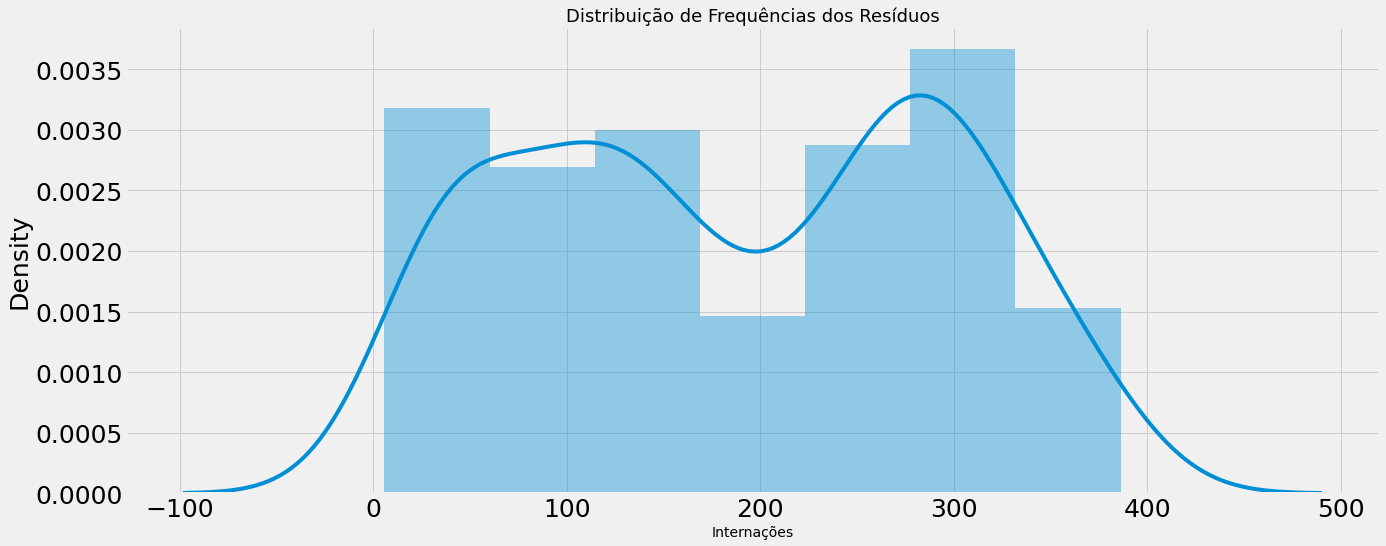

In [178]:
# Gráfico de distribuição Frequências

ax = sns.distplot(pred)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Internações', fontsize=14)
ax

# 7.3) Métricas para o modelo de regressão linear

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [179]:
# Importando bibliotecas verificações das métricas 

from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y_test, model_linear_pred))
mae = mean_absolute_error(y_test, model_linear_pred)
mape = mean_absolute_percentage_error(y_test, model_linear_pred)
mse = mean_squared_error(y_test, model_linear_pred)
r2 = r2_score(y_test, model_linear_pred)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

,Resultado
RMSE,19.530075
MAE,14.802691
MSE,381.423812
MAPE,0.149254
R²,0.960606


In [222]:
# Previsão de internações

prev = x_test[0:25]
model_pred = model_linear.predict(prev)[0]
print("Previsão de internações", model_pred)
prev

Previsão de internações 84.4085713245791


,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Óbitos,Taxa_mortalidade,mes,ano
28,13220.0,15350893.92,12004230.81,3312045.63,1161.19,1170.31,62002.0,4.7,79,1,2,1
12,15576.0,20774806.62,16189665.49,4585141.13,1333.77,1352.26,91424.0,6.0,140,1,5,1
12,14322.0,20181200.29,15622371.88,4457151.31,1409.10,1429.26,86429.0,6.1,108,1,3,2
4,3739.0,2740088.01,2005694.89,734393.12,732.84,732.84,18281.0,4.9,18,0,9,1
1,9498.0,8328186.64,6687975.13,1628627.79,876.84,876.84,46239.0,4.9,55,0,1,1
20,19394.0,24170075.47,18930543.59,4990372.56,1246.27,1250.52,88870.0,4.6,160,1,1,1
20,18969.0,24502056.39,19394723.90,4927374.81,1291.69,1297.30,93784.0,5.0,146,1,2,1
6,3438.0,2139141.93,1534159.23,604982.70,622.21,622.21,16494.0,4.8,11,0,1,1
28,13518.0,15353997.67,11877147.03,3360387.25,1135.82,1144.88,61001.0,4.5,84,1,2,0
31,18886.0,20187082.38,16156487.44,4030594.94,1068.89,1075.78,109260.0,5.8,143,1,7,2


# 7.4) Modelo 02

- Nesse segundo modelo estamos prevendo o número de óbitos utilizando modelo de regressão linear.

In [181]:
# Criando uma Series (pandas) para armazenar números de óbitos

test = data_1['Óbitos'] # Variável para teste
train = data_1.drop('Óbitos', axis=1) # Variável para treino

In [182]:
# Total de linhas e colunas dados variável train

train.shape

(377, 12)

In [183]:
# Total de linhas e colunas dados variável test

test.shape

(377,)

# 7.5) Escalonamento dos dados

In [184]:
# Importando a biblioteca sklearn para o escalonamneto dos dados

from sklearn.preprocessing import StandardScaler

scaler_pre = StandardScaler() # Inicializando o escalonamento
scaler_pre_fit_train = scaler_pre.fit_transform(train) # Treinamento com a função fit_transform com a variável x
scaler_pre_fit_train # Imprimindo o valor do escalonamento

array([[-1.06079618, -0.646678  , -0.62641762, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.23675307, -0.49147487, -0.52357938, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-1.36634026, -0.76997632, -0.73004379, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       ...,
       [-0.69043973, -0.5256219 , -0.52956897, ...,  0.68990214,
        -0.65879474,  1.21666066],
       [ 0.18915686, -0.24861526, -0.22636185, ..., -0.2878915 ,
        -0.65879474,  1.21666066],
       [-0.0237981 , -0.4388296 , -0.47609154, ..., -1.26568513,
        -0.65879474,  1.21666066]])

# 7.6) Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [185]:
# Importação da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(train, # Variável train
                                                    test, # Variável test
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [186]:
# Total de linhas e colunas e linhas dos dados de treino x

x_train_1.shape

(301, 12)

In [187]:
# Total de linhas dos dados de treino y

y_train_1.shape

(301,)

In [188]:
# Total de linhas e colunas dos dados de treino x teste 

x_test_1.shape

(76, 12)

In [189]:
# Total de linhas e colunas dos dados de treino y teste 

y_test_1.shape

(76,)

# 7.7) Modelo regressão linear - 2

In [190]:
# Modelo regressão linear - 2 Óbitos
# Importação da biblioteca sklearn o modelo regressão linear

from sklearn.linear_model import LinearRegression

# Nome do algoritmo M.L
model_linear_2 = LinearRegression() 

# Treinamento do modelo
model_linear_fit = model_linear_2.fit(x_train_1, y_train_1)

# Score do modelo
model_linear_score_2 = model_linear_2.score(x_train_1, y_train_1)

print("Modelo - Regressão linear: %.2f" % (model_linear_score_2 * 100))

Modelo - Regressão linear: 97.75


In [191]:
# Previsão do modelo

model_linear_pred_2 = model_linear_2.predict(x_test_1)
model_linear_pred_2

array([ 86.73711843, 127.58740145, 101.76312528,  10.67444806,
        50.35389489, 167.94808201, 166.5112341 ,  -3.76205844,
        85.03300399, 160.86284244,  26.69264217, 272.24806181,
       184.1628062 ,  39.3693668 , 182.10246743, 172.56603891,
        16.79529982, 198.25299428, 135.03064286, 143.54152891,
       234.48325746, 174.33261017, 120.45316781, 145.24980053,
       244.7229236 , 193.61665903,  40.26219978, 124.91128122,
       178.09740501, 134.1328202 , 121.90842328, 220.79615179,
       244.49296093, 153.13347187,  55.9800286 , 165.46994943,
       142.0156608 , 150.6357909 , 159.92441292,  48.54908397,
       198.13089003, 279.86199607, 140.97500838, 256.68338294,
       358.48710254, 318.27010713, 135.44822693, 205.69871271,
        52.35841119, 258.98659751,  38.01565749, 132.57456052,
       314.85774593, 308.29273694,  24.99434817, 225.15694734,
        24.87706959, 254.64710625, 104.95664692, 183.26664613,
       199.41901043, 108.79447026, 312.8083306 , 291.08

In [192]:
# O intercepto representa o efeito médio em tendo todas as variáveis explicativas excluídas do modelo. 
# De forma mais simples, o intercepto representa o efeito médio em são iguais a zero.

model_linear_2.intercept_

-19.723512918188135

In [193]:
# Os coeficientes de regressão  𝛽2 ,  𝛽3  e  𝛽4  são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares. 
# Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte

model_linear_2.coef_

array([ 7.47976029e-01,  1.51966439e-03, -3.74701948e-06,  4.46266272e-06,
       -4.76048940e-06, -4.46078199e-01,  4.88545305e-01,  2.16453395e-06,
       -5.49944997e+00,  1.40203757e+01, -7.86378552e-02,  2.83505497e+00])

In [194]:
# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. 
# É um valor entra 0 e 1.

print('R² = {}'.format(model_linear_2.score(x_train_1, y_train_1).round(2)))

R² = 0.98


In [195]:
# Previsão do modelo 

pred_2 = model_linear_2.predict(x_train_1)
pred_2 = y_train - pred_2
pred_2

21    -6.822369
20    18.947128
1     20.285681
12   -23.547938
2     18.115515
        ...    
1      1.416452
5     52.470821
12    -2.388912
25    18.044090
13    -1.286805
Name: Internações, Length: 301, dtype: float64

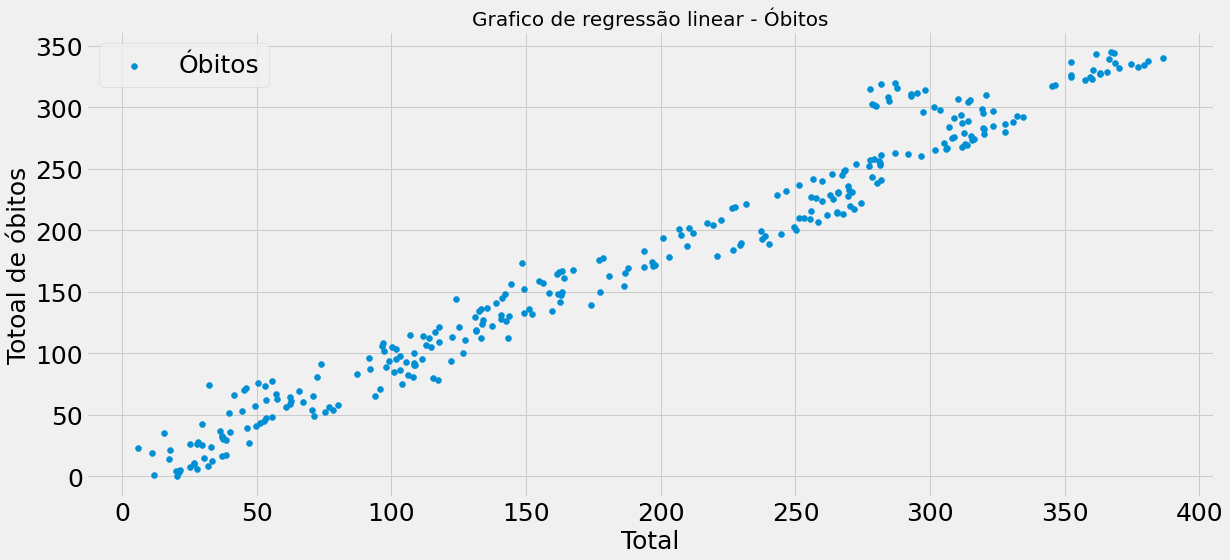

In [196]:
# Grafico de regressão linear

plt.figure(figsize=(18, 8))
plt.scatter(pred, y_train_1)
plt.title("Grafico de regressão linear - Óbitos", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Totoal de óbitos")
plt.legend(["Óbitos", "Valor"])

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Internações', ylabel='Density'>

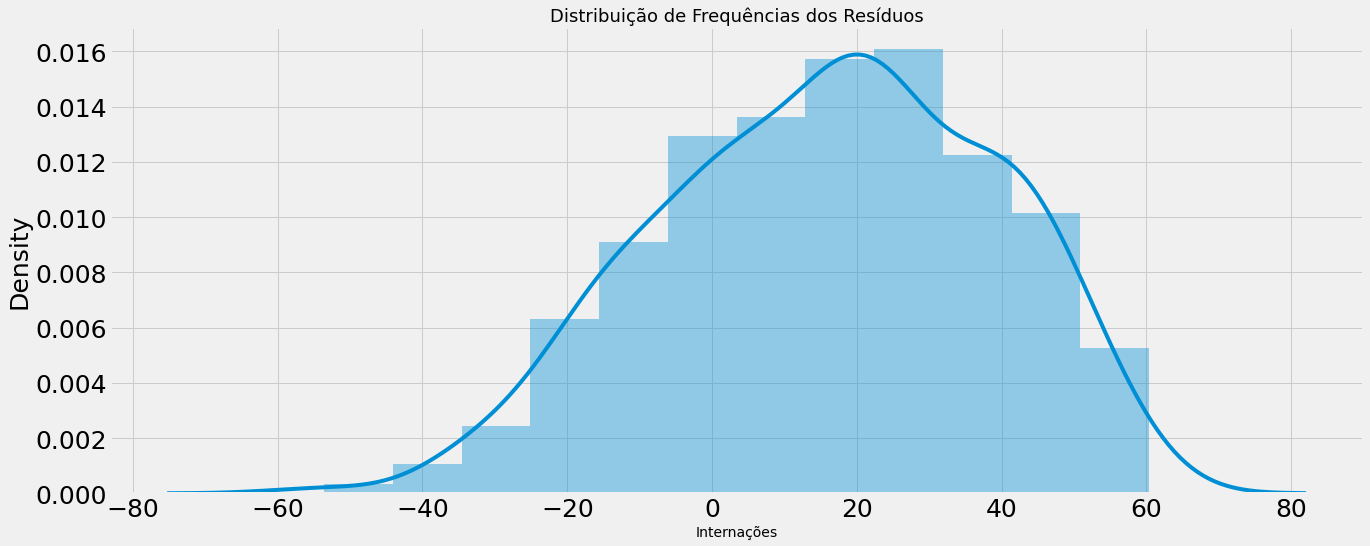

In [197]:
# Distribuição de Frequências dos Resíduos

ax = sns.distplot(pred_2)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Internações', fontsize=14)
ax

# 7.8) Métricas para o modelo 2 regressão linear

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [198]:
# Verificações das métricas 

rmse = np.sqrt(mean_squared_error(y_test, model_linear_pred_2))
mae = mean_absolute_error(y_test, model_linear_pred_2)
mape = mean_absolute_percentage_error(y_test, model_linear_pred_2)
mse = mean_squared_error(y_test, model_linear_pred_2)
r2 = r2_score(y_test, model_linear_pred_2)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultado'])

,Resultado
RMSE,25.757131
MAE,21.715011
MSE,663.429819
MAPE,0.191711
R²,0.931480


In [221]:
# Previsão de obitos

prev_2 = x_test_1[0:25]
model_pred_2 = model_linear_2.predict(prev_2)[0]
print("Previsão de óbitos", model_pred_2)
prev_2

Previsão de óbitos 86.73711843263169


,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Taxa_mortalidade,mes,ano
28,82,13220.0,15350893.92,12004230.81,3312045.63,1161.19,1170.31,62002.0,4.7,1,2,1
12,136,15576.0,20774806.62,16189665.49,4585141.13,1333.77,1352.26,91424.0,6.0,1,5,1
12,95,14322.0,20181200.29,15622371.88,4457151.31,1409.10,1429.26,86429.0,6.1,1,3,2
4,31,3739.0,2740088.01,2005694.89,734393.12,732.84,732.84,18281.0,4.9,0,9,1
1,69,9498.0,8328186.64,6687975.13,1628627.79,876.84,876.84,46239.0,4.9,0,1,1
20,189,19394.0,24170075.47,18930543.59,4990372.56,1246.27,1250.52,88870.0,4.6,1,1,1
20,186,18969.0,24502056.39,19394723.90,4927374.81,1291.69,1297.30,93784.0,5.0,1,2,1
6,16,3438.0,2139141.93,1534159.23,604982.70,622.21,622.21,16494.0,4.8,0,1,1
28,84,13518.0,15353997.67,11877147.03,3360387.25,1135.82,1144.88,61001.0,4.5,1,2,0
31,185,18886.0,20187082.38,16156487.44,4030594.94,1068.89,1075.78,109260.0,5.8,1,7,2


# 7.9) Modelo 03: Regressão linear

- Nesse modelo estamos prevendo o valor Médio de AIH pelos próximos 6 meses utilizando modelo de regressão linear.

# Treino e Teste

- Treino e teste da base de dados da coluna Internações

In [224]:
y2 = data_1['Valor_médio_AIH'] # Variável para y2
x1 = data_1.drop('Valor_médio_AIH', axis=1) # Variável para x1

In [225]:
# Total de linhas e colunas dados variável x

x1.shape

(377, 12)

In [226]:
# Total de linhas e colunas dados variável y

y2.shape

(377,)

# 8.0) Escalonamento dos dados

In [227]:
# Importando a biblioteca sklearn para o escalonamneto dos dados

from sklearn.preprocessing import StandardScaler 

scaler_pre = StandardScaler() # Inicializando o escalonamento
scaler_pre_fit_train = scaler_pre.fit_transform(x1) # Treinamento com a função fit_transform com a variável x1
scaler_pre_fit_train # Imprimindo o valor do escalonamento

array([[-1.06079618, -0.646678  , -0.62641762, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-0.23675307, -0.49147487, -0.52357938, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       [-1.36634026, -0.76997632, -0.73004379, ..., -0.2878915 ,
         0.99477129,  1.21666066],
       ...,
       [-0.69043973, -0.5256219 , -0.52956897, ...,  0.68990214,
        -0.65879474,  1.21666066],
       [ 0.18915686, -0.24861526, -0.22636185, ..., -0.2878915 ,
        -0.65879474,  1.21666066],
       [-0.0237981 , -0.4388296 , -0.47609154, ..., -1.26568513,
        -0.65879474,  1.21666066]])

# 9.0) Modelo treinado para x, y valor

- 20% para os dados de treino
- 80% para teste
- Random state igual a zero

In [228]:
# Importação da biblioteca sklearn para treino e teste do modelo

from sklearn.model_selection import train_test_split 

train_x, test_x, train_y, test_y = train_test_split(train, # Variável x1
                                                    test, # Variável y2
                                                    test_size=0.2, # Divivindo os dados em 20% para treino e 80% para teste
                                                    random_state = 0) # Random state igual a zero

In [229]:
# Total de linhas e colunas e linhas dos dados de treino x

train_x.shape

(301, 12)

In [230]:
# Total de linhas dos dados de treino y

train_y.shape

(301,)

In [231]:
# Total de linhas e colunas dos dados de treino x teste 

test_x.shape

(76, 12)

In [232]:
# Total de linhas e colunas dos dados de treino y teste 

test_y.shape

(76,)

In [233]:
# Modelo regressão linear - 3 Valor Médio de AIH
# Importação da biblioteca sklearn o modelo regressão linear

from sklearn.linear_model import LinearRegression

# Nome do algoritmo M.L
model_linear_3 = LinearRegression() 

# Treinamento do modelo
model_linear_fit = model_linear_3.fit(train_x, train_y)

# Score do modelo
model_linear_score_3 = model_linear_3.score(x_train_1, y_train_1)

print("Modelo - Regressão linear: %.2f" % (model_linear_score_3 * 100))

Modelo - Regressão linear: 97.75


In [234]:
# Previsão do modelo

model_linear_pred_3 = model_linear_3.predict(x_test_1)
model_linear_pred_3

array([ 86.73711843, 127.58740145, 101.76312528,  10.67444806,
        50.35389489, 167.94808201, 166.5112341 ,  -3.76205844,
        85.03300399, 160.86284244,  26.69264217, 272.24806181,
       184.1628062 ,  39.3693668 , 182.10246743, 172.56603891,
        16.79529982, 198.25299428, 135.03064286, 143.54152891,
       234.48325746, 174.33261017, 120.45316781, 145.24980053,
       244.7229236 , 193.61665903,  40.26219978, 124.91128122,
       178.09740501, 134.1328202 , 121.90842328, 220.79615179,
       244.49296093, 153.13347187,  55.9800286 , 165.46994943,
       142.0156608 , 150.6357909 , 159.92441292,  48.54908397,
       198.13089003, 279.86199607, 140.97500838, 256.68338294,
       358.48710254, 318.27010713, 135.44822693, 205.69871271,
        52.35841119, 258.98659751,  38.01565749, 132.57456052,
       314.85774593, 308.29273694,  24.99434817, 225.15694734,
        24.87706959, 254.64710625, 104.95664692, 183.26664613,
       199.41901043, 108.79447026, 312.8083306 , 291.08

In [235]:
# O intercepto representa o efeito médio em tendo todas as variáveis explicativas excluídas do modelo. 
# De forma mais simples, o intercepto representa o efeito médio em são iguais a zero.

model_linear_3.intercept_

-19.723512918188135

In [236]:
# Os coeficientes de regressão  𝛽2 ,  𝛽3  e  𝛽4  são conhecidos como coeficientes parciais de regressão ou coeficientes parciais angulares. 
# Considerando o número de variáveis explicativas de nosso modelo, seu significado seria o seguinte.

model_linear_3.coef_

array([ 7.47976029e-01,  1.51966439e-03, -3.74701948e-06,  4.46266272e-06,
       -4.76048940e-06, -4.46078199e-01,  4.88545305e-01,  2.16453395e-06,
       -5.49944997e+00,  1.40203757e+01, -7.86378552e-02,  2.83505497e+00])

In [237]:
# O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. 
# É um valor entra 0 e 1.

print('R² = {}'.format(model_linear_3.score(x_train_1, y_train_1).round(2)))

R² = 0.98


In [238]:
# Previsão do modelo

pred_2 = model_linear_3.predict(train_x)
pred_2 = y_train - pred_2
pred_2

21    -6.822369
20    18.947128
1     20.285681
12   -23.547938
2     18.115515
        ...    
1      1.416452
5     52.470821
12    -2.388912
25    18.044090
13    -1.286805
Name: Internações, Length: 301, dtype: float64

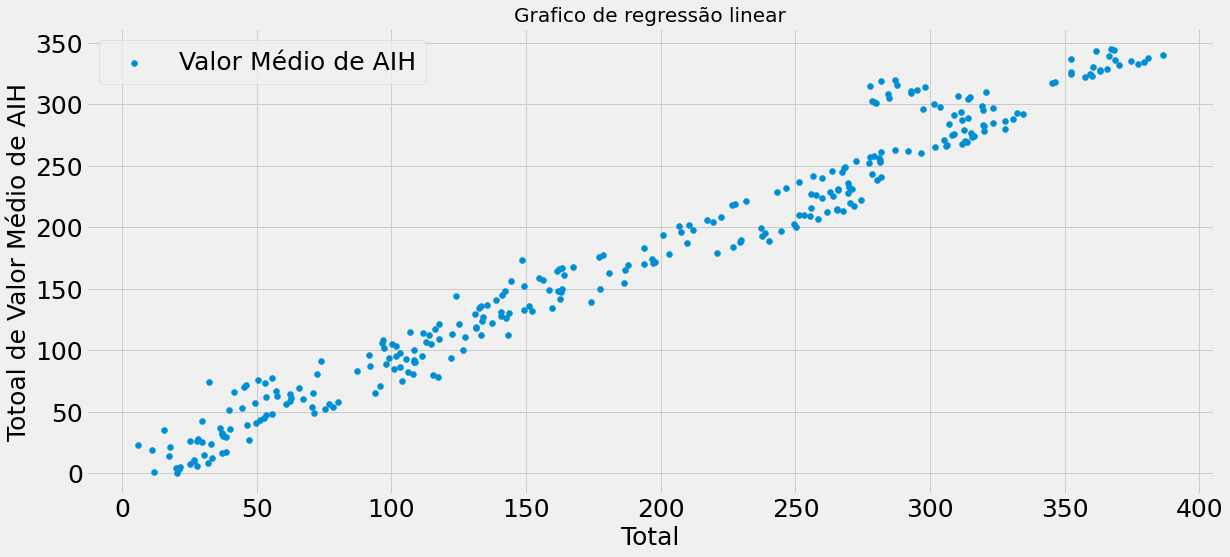

In [239]:
# Grafico de regressão linear

plt.figure(figsize=(18, 8))
plt.scatter(pred, train_y)
plt.title("Grafico de regressão linear", fontsize = 20)
plt.xlabel("Total")
plt.ylabel("Totoal de Valor Médio de AIH")
plt.legend(["Valor Médio de AIH", "Valor"])

<AxesSubplot:title={'center':'Distribuição de Frequências dos Resíduos'}, xlabel='Internações', ylabel='Density'>

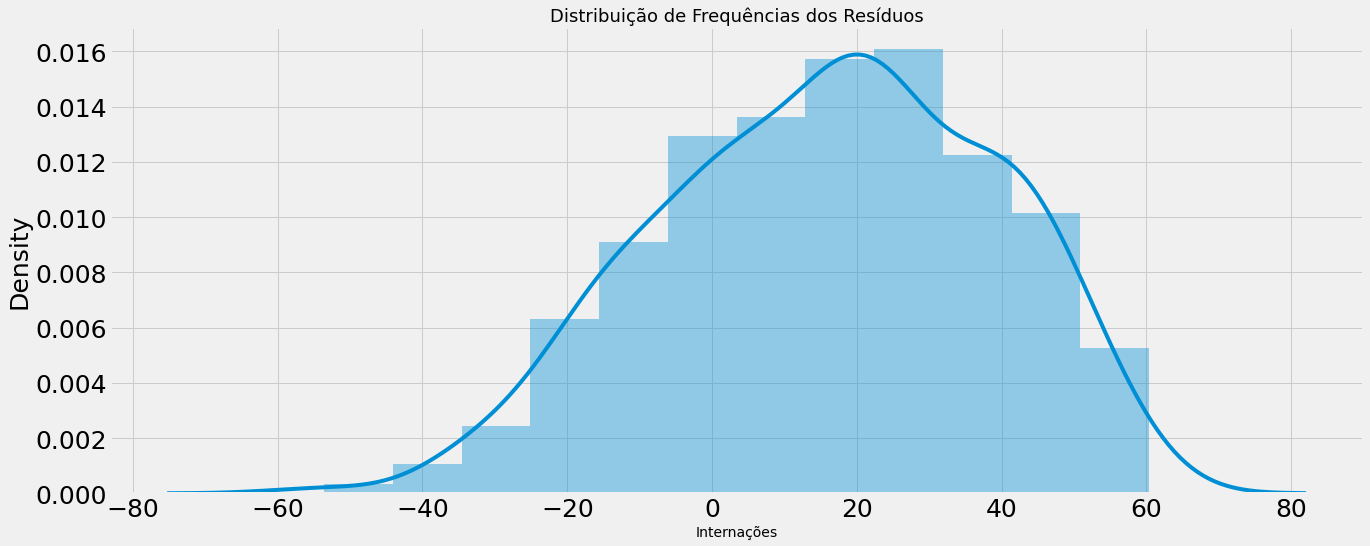

In [240]:
# Distribuição de Frequências dos Resíduos

ax = sns.distplot(pred_2)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('Internações', fontsize=14)
ax

# 1.0) Métricas para o modelo 3 regressão linear 

- RMSE: Raiz do erro quadrático médio 
- MAE: Erro absoluto médio  
- MSE: Erro médio quadrático
- MAPE: Erro Percentual Absoluto Médio
- R2: O R-Quadrado, ou Coeficiente de Determinação, é uma métrica que visa expressar a quantidade da variança dos dados.

In [241]:
# Verificações das métricas 

rmse = np.sqrt(mean_squared_error(y_test, model_linear_pred_3))
mae = mean_absolute_error(y_test, model_linear_pred_3)
mape = mean_absolute_percentage_error(y_test, model_linear_pred_3)
mse = mean_squared_error(y_test, model_linear_pred_3)
r2 = r2_score(y_test, model_linear_pred_3)

pd.DataFrame([rmse, mae, mse, mape, r2], ['RMSE', 'MAE', 'MSE', "MAPE",'R²'], columns=['Resultados'])

,Resultados
RMSE,25.757131
MAE,21.715011
MSE,663.429819
MAPE,0.191711
R²,0.931480


In [242]:
# Previsão valor Médio de AIH

prev_3 = x_test_1[0:25]
model_pred_3 = model_linear_3.predict(prev_3)[0]
print("Previsão total valor Médio de AIH:", model_pred_3)
prev_3

Previsão total valor Médio de AIH: 86.73711843263169


,Internações,AIH_aprovadas,Valor_total,Valor_serviços_hospitalares,Valor_serviços_profissionais,Valor_médio_AIH,Valor_médio_intern,Dias_permanência,Média_permanência,Taxa_mortalidade,mes,ano
28,82,13220.0,15350893.92,12004230.81,3312045.63,1161.19,1170.31,62002.0,4.7,1,2,1
12,136,15576.0,20774806.62,16189665.49,4585141.13,1333.77,1352.26,91424.0,6.0,1,5,1
12,95,14322.0,20181200.29,15622371.88,4457151.31,1409.10,1429.26,86429.0,6.1,1,3,2
4,31,3739.0,2740088.01,2005694.89,734393.12,732.84,732.84,18281.0,4.9,0,9,1
1,69,9498.0,8328186.64,6687975.13,1628627.79,876.84,876.84,46239.0,4.9,0,1,1
20,189,19394.0,24170075.47,18930543.59,4990372.56,1246.27,1250.52,88870.0,4.6,1,1,1
20,186,18969.0,24502056.39,19394723.90,4927374.81,1291.69,1297.30,93784.0,5.0,1,2,1
6,16,3438.0,2139141.93,1534159.23,604982.70,622.21,622.21,16494.0,4.8,0,1,1
28,84,13518.0,15353997.67,11877147.03,3360387.25,1135.82,1144.88,61001.0,4.5,1,2,0
31,185,18886.0,20187082.38,16156487.44,4030594.94,1068.89,1075.78,109260.0,5.8,1,7,2


# 1.1) Resultados final dos modelos

In [243]:
# Exibindo um comparativo dos modelos de regressão linear

modelos = pd.DataFrame({
    
    "Modelos" :["Modelo regressão linear 1", 
                "Modelo regressão linear 2", 
                "Modelo regressão linear 3"],

    "Acurácia" :[model_linear_score_1, 
                 model_linear_score_2, 
                 model_linear_score_3]})

modelos.sort_values(by = "Acurácia", ascending = True)

,Modelos,Acurácia
0,Modelo regressão linear 1,0.971866
1,Modelo regressão linear 2,0.977523
2,Modelo regressão linear 3,0.977523


In [244]:
# Salvando modelo de regressão linear

import pickle

with open('model_linear_pred.pkl', 'wb') as file:
    pickle.dump(model_linear_pred, file)
    
with open('model_linear_pred_2.pkl', 'wb') as file:
    pickle.dump(model_linear_pred_2, file)
    
with open('model_linear_pred_3.pkl', 'wb') as file:
    pickle.dump(model_linear_pred_3, file)

# Conclusão do modelo machine learning

Pela análise dos modelos, modelo 1 teve melhor resultado que os demais, atigindo uma acurácia de 97.18% ou seja capaz de acertar as previsões de internações, óbitos, valor do AIH. De acordo com análise realizada.  